<a href="https://colab.research.google.com/github/m-wessler/wr-stid-notebooks/blob/main/nbm/NBM_4_x_PoWT_Analysis_from_Archive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U gdown

import gdown

In [ ]:
file_id = "1hTh9kfnVRVjjN_McE-eY9BIlsbuLbDQv"
gdown_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(gdown_url, output="NBM_PoWT_Dataset_20230120_20250430.parquet.gzip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1hTh9kfnVRVjjN_McE-eY9BIlsbuLbDQv
From (redirected): https://drive.google.com/uc?id=1hTh9kfnVRVjjN_McE-eY9BIlsbuLbDQv&confirm=t&uuid=8a510b65-c3d5-4b3c-ab79-5e3910e23780
To: /content/NBM_PoWT_Dataset_20230120_20250430.parquet.gzip
100%|██████████| 120M/120M [00:01<00:00, 101MB/s]


'NBM_PoWT_Dataset_20230120_20250430.parquet.gzip'

In [ ]:
import requests, gc
import pandas as pd
import numpy as np

database_file = '/content/NBM_PoWT_Dataset_20230120_20250430.parquet.gzip'

cwa_selection = 'MSO' # comma separated string
fhr_selection = None #list of ints

In [ ]:
def optimize_df(df):
    """
    Ensures no column has more than two decimal points and avoids converting integers to floats unnecessarily.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The updated DataFrame.
    """
    updated_df = df.copy()  # Work on a copy of the DataFrame

    for col in updated_df.columns:
        col_dtype = updated_df[col].dtype  # Get the column's data type

        # Check if column is numeric
        if pd.api.types.is_numeric_dtype(col_dtype):
            # If the column is floating-point, round to two decimal places
            if pd.api.types.is_float_dtype(col_dtype):
                updated_df[col] = updated_df[col].round(3)
            # If the column is integer, leave it as is
            elif pd.api.types.is_integer_dtype(col_dtype):
                continue  # No changes needed for integers

    return updated_df

In [ ]:
import numpy as np
import gc
import pandas as pd

df = optimize_df(pd.read_parquet(database_file))
gc.collect()

df.index = df.index.set_levels(
    pd.to_datetime(df.index.levels[0]), level='timestamp')

df.sort_index(inplace=True)

if cwa_selection:
    print(f"Selected CWAs: {cwa_selection.split(',')}")
    cwas = [cwa.strip() for cwa in cwa_selection.split(",")]
    cwa_mask = df.index.get_level_values('cwa').isin(cwas)
    df = df[cwa_mask]
else:
    print("No CWAs selected. Using all stations.")

if fhr_selection:
    print(f"Selected FHRs: {fhr_selection}")
    fhr_mask = df.index.get_level_values("fhr").isin(fhr_selection)
    df = df[fhr_mask]
else:
    print("No FHR selected. Using all FHRs.")

gc.collect()

start_date = df.index.get_level_values('timestamp').min().strftime('%Y-%m-%d')
end_date = df.index.get_level_values('timestamp').max().strftime('%Y-%m-%d')

df['snowlvl_agl'] = df['snowlvl'] - df['elevation']

df

Selected CWAs: ['MSO']
No FHR selected. Using all FHRs.


T    FXT     RH  FXRH     Tw   FXTw  elevation  \
timestamp  fhr cwa stid                                                       
2023-01-20 24  MSO KBTM  24.80  27.05  85.93  72.0  22.75  23.36     5545.0   
                   KBTM  24.80  27.05  85.93  72.0  22.75  23.36     5545.0   
                   KHRF  35.60  28.49  43.88  78.0  28.19  25.38     3644.0   
                   KHRF  33.80  28.49  50.98  78.0  27.35  25.38     3644.0   
                   KHRF  33.80  28.49  50.98  78.0  27.35  25.38     3644.0   
...                        ...    ...    ...   ...    ...    ...        ...   
2025-04-30 168 MSO KMLP  35.96  45.00  89.15  55.0  34.10  37.61     6001.0   
                   KMSO  57.20  60.12  47.46  38.0  46.88  47.33     3199.0   
                   KMSO  55.94  60.12  48.97  38.0  46.09  47.33     3199.0   
                   KMSO  55.40  60.12  50.65  38.0  45.95  47.33     3199.0   
                   KSMN  55.04  61.56  59.06  27.0  47.20  45.86     4045.0   

                         snowlvl     RA     SN     ZR     PL     UP   PRA  \
timestamp  fhr cwa stid                                                     
2023-01-20 24  MSO KBTM  2808.40  False   True  False  False  False   0.0   
                   KBTM  2808.40  False  False  False  False  False   0.0   
                   KHRF  2309.71  False  False  False  False  False   0.0   
                   KHRF  2309.71  False  False  False  False  False   0.0   
                   KHRF  2309.71  False  False  False  False  False   0.0   
...                          ...    ...    ...    ...    ...    ...   ...   
2025-04-30 168 MSO KMLP  7175.20  False  False  False  False  False  22.8   
                   KMSO  7516.40  False  False  False  False  False  10.8   
                   KMSO  7516.40  False  False  False  False  False  10.8   
                   KMSO  7516.40  False  False  False  False  False  10.8   
                   KSMN  8120.08   True  False  False  False  False   3.6   

                         PZR   PSN  PPL  snowlvl_agl  
timestamp  fhr cwa stid                               
2023-01-20 24  MSO KBTM  0.0  46.5  0.0     -2736.60  
                   KBTM  0.0  46.5  0.0     -2736.60  
                   KHRF  0.0   7.0  0.0     -1334.29  
                   KHRF  0.0   7.0  0.0     -1334.29  
                   KHRF  0.0   7.0  0.0     -1334.29  
...                      ...   ...  ...          ...  
2025-04-30 168 MSO KMLP  0.0   0.0  0.0      1174.20  
                   KMSO  0.0   0.0  0.0      4317.40  
                   KMSO  0.0   0.0  0.0      4317.40  
                   KMSO  0.0   0.0  0.0      4317.40  
                   KSMN  0.0   0.0  0.0      4075.08  

[266023 rows x 18 columns]

In [ ]:
# Overwrite old Tw with new calc #

def wet_bulb_temperature_stull(T, RH):
    """
    Calculate wet bulb temperature using Stull (2011) formula.
    T: Air temperature in degrees Celsius
    RH: Relative humidity in percent (0-100)
    Returns: Wet bulb temperature in degrees Celsius
    """
    T = np.asarray(T)
    RH = np.asarray(RH)
    tw = (
        T * np.arctan(0.151977 * np.sqrt(RH + 8.313659)) +
        np.arctan(T + RH) -
        np.arctan(RH - 1.676331) +
        0.00391838 * RH ** 1.5 * np.arctan(0.023101 * RH) -
        4.686035
    )
    return tw

# Overwrite old Tw with new calc #
df["Tw"] = wet_bulb_temperature_stull(df["T"].values, df["RH"].values)
df["FXTw"] = wet_bulb_temperature_stull(df["FXT"].values, df["FXRH"].values)

In [ ]:
# Initial count
initial_size = df.shape[0]
print(f"Initial row count: {initial_size}")

# QC for ZR, PL, SN, UP when Tw > 36F
mask_qc1 = (df['Tw'] > 36) & (
    (df['SN'] == True) | (df['ZR'] == True) | (df['PL'] == True) | (df['UP'] == True)
)
n_removed_qc1 = mask_qc1.sum()
pct_removed_qc1 = 100 * n_removed_qc1 / initial_size
print(f"QC Step 1: Remove ZR/PL/SN/UP when Tw > 36°F")
print(f"  Rows removed: {n_removed_qc1} ({pct_removed_qc1:.2f}%)")
df = df.loc[~mask_qc1].copy()  # <--- Use .loc and .copy()
size_after_qc1 = df.shape[0]

# QC for RA when Tw < 28 F
mask_qc2 = (df['Tw'] < 28) & (df['RA'] == True)
n_removed_qc2 = mask_qc2.sum()
pct_removed_qc2 = 100 * n_removed_qc2 / initial_size
print(f"QC Step 2: Remove RA when Tw < 28°F")
print(f"  Rows removed: {n_removed_qc2} ({pct_removed_qc2:.2f}%)")
df = df.loc[~mask_qc2].copy()  # <--- Use .loc and .copy()
size_after_qc2 = df.shape[0]

# # Summary
print(f"Row count after QC Step 1: {size_after_qc1} ({100*size_after_qc1/initial_size:.2f}% of initial)")
print(f"Row count after QC Step 2: {size_after_qc2} ({100*size_after_qc2/initial_size:.2f}% of initial)")

tempqc_mae_threshold = 25

# Calculate absolute error between FXT and T
df.loc[:, 'abs_error'] = np.abs(df['FXT'] - df['T'])  # <--- Use .loc

# Calculate MAE
mae = df['abs_error'].mean()
print(f"Mean Absolute Error (MAE) between FXT and T: {mae:.3f}")

# Remove outliers where abs_error > threshold
n_before = df.shape[0]
df = df.loc[df['abs_error'] <= tempqc_mae_threshold].copy()  # <--- Use .loc and .copy()
n_after = df.shape[0]
n_removed = n_before - n_after
pct_removed = 100 * n_removed / n_before

print(f"Rows removed (abs_error > {tempqc_mae_threshold}): {n_removed} ({pct_removed:.2f}%)")
print(f"Remaining rows: {n_after}")

# Optionally, drop the helper column
df = df.drop(columns=['abs_error'])

# Set probs [0, 1] instead of [0, 100]
df.loc[:, ['PRA', 'PSN', 'PZR', 'PPL']] = df.loc[:, ['PRA', 'PSN', 'PZR', 'PPL']] / 100  # <--- Use .loc
gc.collect()

Initial row count: 266023
QC Step 1: Remove ZR/PL/SN/UP when Tw > 36°F
  Rows removed: 273 (0.10%)
QC Step 2: Remove RA when Tw < 28°F
  Rows removed: 99 (0.04%)
Row count after QC Step 1: 265750 (99.90% of initial)
Row count after QC Step 2: 265651 (99.86% of initial)
Mean Absolute Error (MAE) between FXT and T: 3.705
Rows removed (abs_error > 25): 78 (0.03%)
Remaining rows: 265573


0

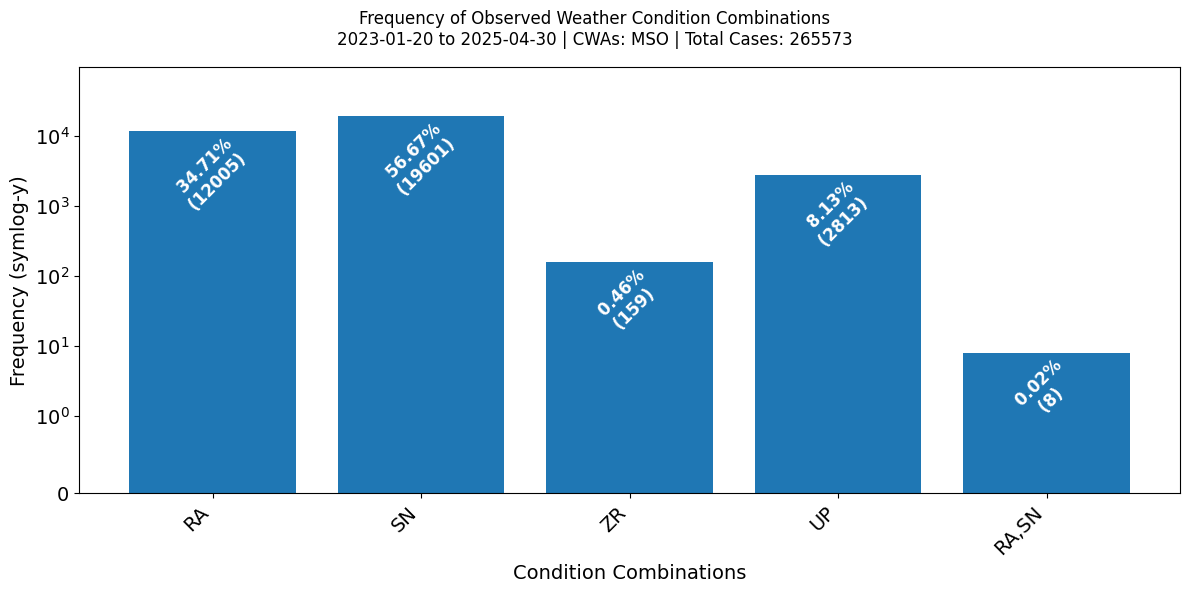

In [ ]:
import itertools
import matplotlib.pyplot as plt

# Create a dictionary to store combination counts
combination_counts = {}

# Iterate through all possible combinations of conditions
for i in range(1, 5):  # Iterate through combinations of 1 to 4 conditions
    for combo in itertools.combinations(['RA', 'SN', 'ZR', 'PL', 'UP'], i):
        # Create a boolean series indicating if the combination is present
        combo_series = df[list(combo)].all(axis=1)

        # Count the occurrences of the combination
        combination_counts[','.join(combo)] = combo_series.sum()

# Filter the dictionary to remove combinations with counts less than 1
filtered_combination_counts = {k: v for k, v in combination_counts.items() if v >= 1}

# Calculate the total count for percentages
total_count = sum(filtered_combination_counts.values())

# Create a bar plot using the filtered data
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_combination_counts.keys(), filtered_combination_counts.values())
plt.xticks(rotation=45, ha='right', fontsize=14)  # Set font size for x-axis ticks
plt.yscale('symlog', linthresh=1)  # Use symlog for better visualization of small values

# Adjust the y-axis to add whitespace above the tallest bar
max_y = max(filtered_combination_counts.values())  # Get the tallest bar value
plt.ylim(top=max_y * 5)  # Add extra space above the tallest bar

plt.xlabel('Condition Combinations', fontsize=14)  # Set font size for x-axis label
plt.ylabel('Frequency (symlog-y)', fontsize=14)  # Set font size for y-axis label
plt.yticks(fontsize=14)  # Set font size for y-axis ticks

# Add percentage annotations with dynamic styling
threshold = max_y * 0.0001  # Define a threshold for "small" bars
for bar, value in zip(bars, filtered_combination_counts.values()):
    percentage = (value / total_count) * 100  # Calculate percentage
    if value <= threshold:  # Small bars
        plt.text(
            bar.get_x() + bar.get_width() / 2, value, f"  {percentage:.4f}% \n({value:d}) ",
            ha='center', va='bottom', fontsize=12, color='black', weight='bold', rotation=45,
        )
    else:  # Tall bars
        plt.text(
            bar.get_x() + bar.get_width() / 2, value, f" {percentage:.2f}% \n({value:d}) ",
            ha='center', va='top', fontsize=12, color='white', weight='bold', rotation=45
        )

# Update the plot title with the filtered data
# unique_cwas = ", ".join(cwa_selection) if cwa_selection else "All CWAs"
unique_cwas = cwa_selection if cwa_selection else "All CWAs"
case_count = len(df)

plot_title = (
    f"Frequency of Observed Weather Condition Combinations\n"
    f"{start_date} to {end_date} | CWAs: {unique_cwas} | Total Cases: {case_count}"
)

plt.suptitle(plot_title)

plt.tight_layout()
plt.show()

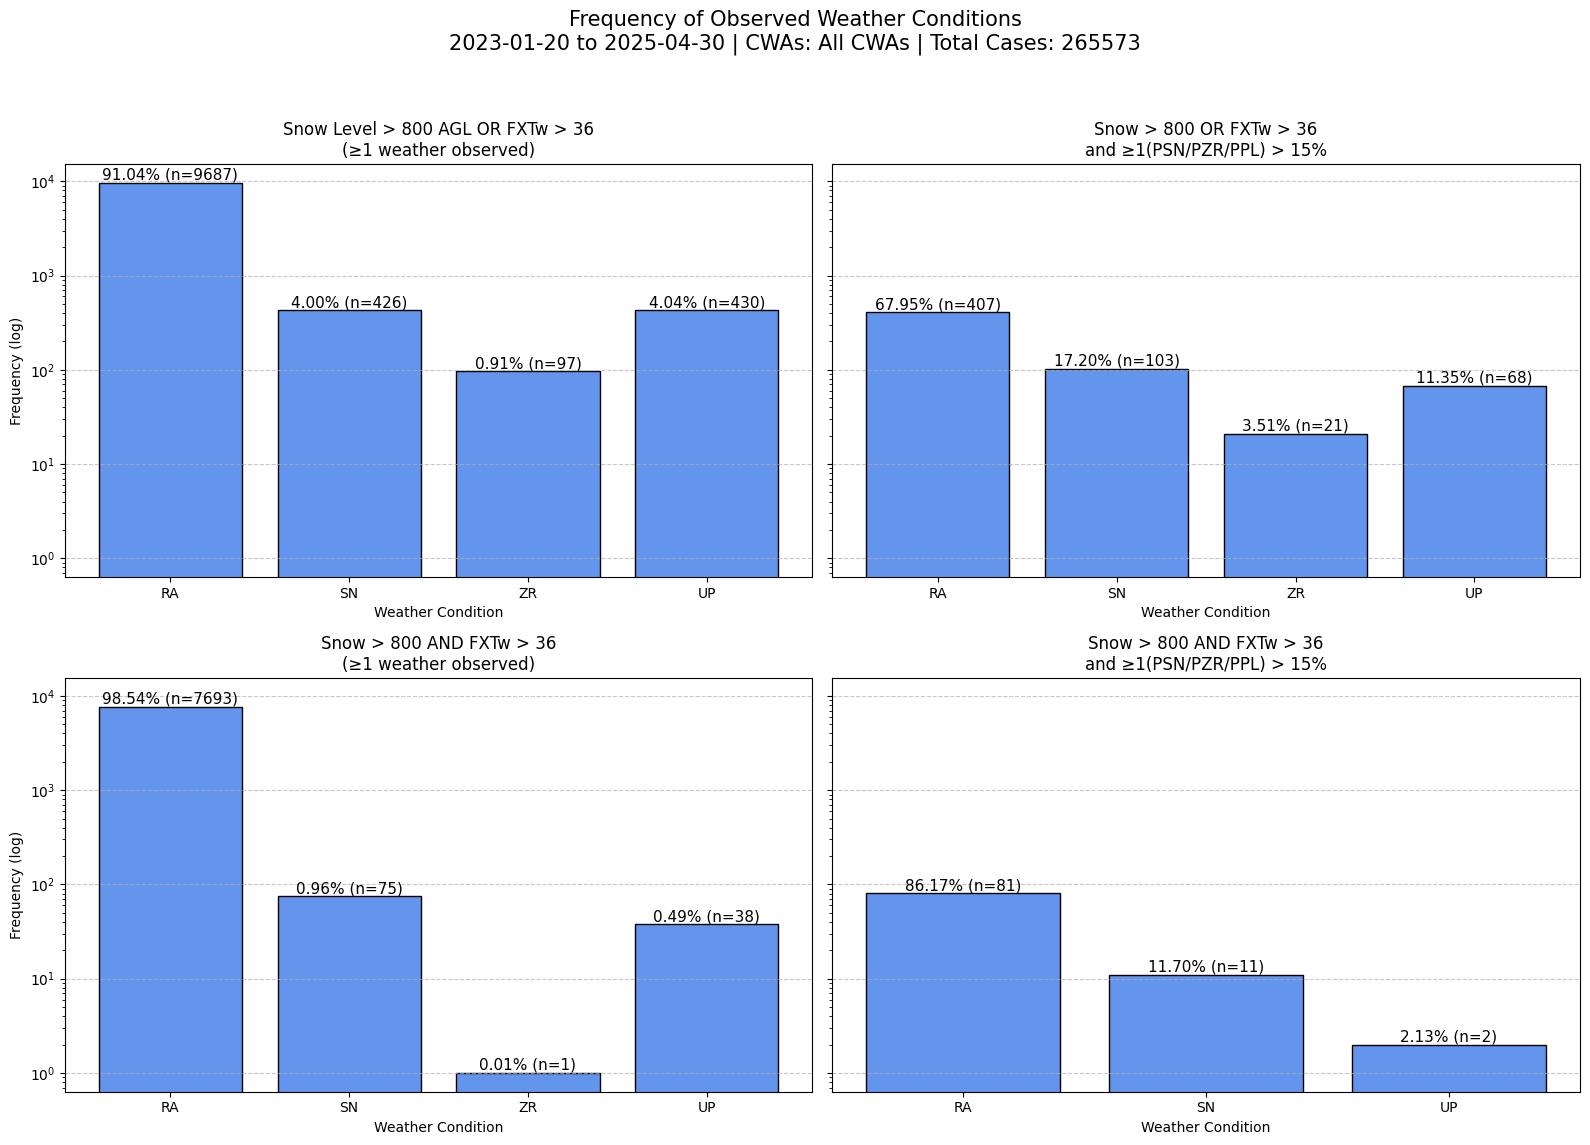

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_weather_histogram_snowlvl_or_fxtw_prob_fxtw_2x2(df):
    """
    Four-panel (2x2) histogram for RA, SN, ZR, PL, UP.
      [0,0]: snowlvl_agl > 800 ft OR FXTw > 36, at least one weather observed.
      [0,1]: As [0,0], but also requires at least one of PSN, PZR, PPL > 0.15.
      [1,0]: snowlvl_agl > 800 ft AND FXTw > 36, at least one weather observed.
      [1,1]: As [1,0], but also requires at least one of PSN, PZR, PPL > 0.15.
    Annotates percent and count per bar.
    """
    weather_cols = ['RA', 'SN', 'ZR', 'PL', 'UP']
    prob_cols = ['PSN', 'PZR', 'PPL']

    # Top-left: snowlvl_agl > 800 OR FXTw > 36, at least one weather observed
    mask_00 = ((df['snowlvl_agl'] > 800) | (df['FXTw'] > 36)) & df[weather_cols].any(axis=1)
    df_00 = df.loc[mask_00]
    counts_00 = df_00[weather_cols].sum()
    counts_00 = counts_00[counts_00 > 0]
    total_00 = len(df_00)

    # Top-right: add at least one of PSN, PZR, PPL > 0.15
    mask_prob = (df[prob_cols] > 0.15).any(axis=1)
    mask_01 = mask_00 & mask_prob
    df_01 = df.loc[mask_01]
    counts_01 = df_01[weather_cols].sum()
    counts_01 = counts_01[counts_01 > 0]
    total_01 = len(df_01)

    # Bottom-left: snowlvl_agl > 800 AND FXTw > 36, at least one weather observed
    mask_10 = (df['snowlvl_agl'] > 800) & (df['FXTw'] > 36) & df[weather_cols].any(axis=1)
    df_10 = df.loc[mask_10]
    counts_10 = df_10[weather_cols].sum()
    counts_10 = counts_10[counts_10 > 0]
    total_10 = len(df_10)

    # Bottom-right: add at least one of PSN, PZR, PPL > 0.15
    mask_11 = mask_10 & mask_prob
    df_11 = df.loc[mask_11]
    counts_11 = df_11[weather_cols].sum()
    counts_11 = counts_11[counts_11 > 0]
    total_11 = len(df_11)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
    panels = [
        (axes[0,0], counts_00, total_00, "Snow Level > 800 AGL OR FXTw > 36\n(≥1 weather observed)"),
        (axes[0,1], counts_01, total_01, "Snow > 800 OR FXTw > 36\nand ≥1(PSN/PZR/PPL) > 15%"),
        (axes[1,0], counts_10, total_10, "Snow > 800 AND FXTw > 36\n(≥1 weather observed)"),
        (axes[1,1], counts_11, total_11, "Snow > 800 AND FXTw > 36\nand ≥1(PSN/PZR/PPL) > 15%")
    ]

    for ax, counts, total, title in panels:
        if not counts.empty:
            bars = ax.bar(counts.index, counts.values, color='cornflowerblue', edgecolor='black')
            for bar, val in zip(bars, counts.values):
                pct = val / total * 100 if total else 0
                ax.text(bar.get_x() + bar.get_width()/2, val,
                        f"{pct:.2f}% (n={val})",
                        ha="center", va="bottom", fontsize=11)
            ax.set_title(title)
        else:
            ax.text(0.5, 0.5, "No data for this panel", ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"No Data\n({title})")
            ax.axis('off')
        ax.set_xlabel("Weather Condition")
        ax.set_yscale("log")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    axes[0,0].set_ylabel("Frequency (log)")
    axes[1,0].set_ylabel("Frequency (log)")

    # Optionally add metadata title if available
    unique_cwas = cwa_selection if 'cwa_selection' in locals() and cwa_selection else "All CWAs"
    case_count = len(df)
    plot_title = (
        f"Frequency of Observed Weather Conditions\n"
        f"{start_date} to {end_date} | CWAs: {unique_cwas} | Total Cases: {case_count}"
    )
    fig.suptitle(plot_title, fontsize=15)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Usage:
plot_weather_histogram_snowlvl_or_fxtw_prob_fxtw_2x2(df)

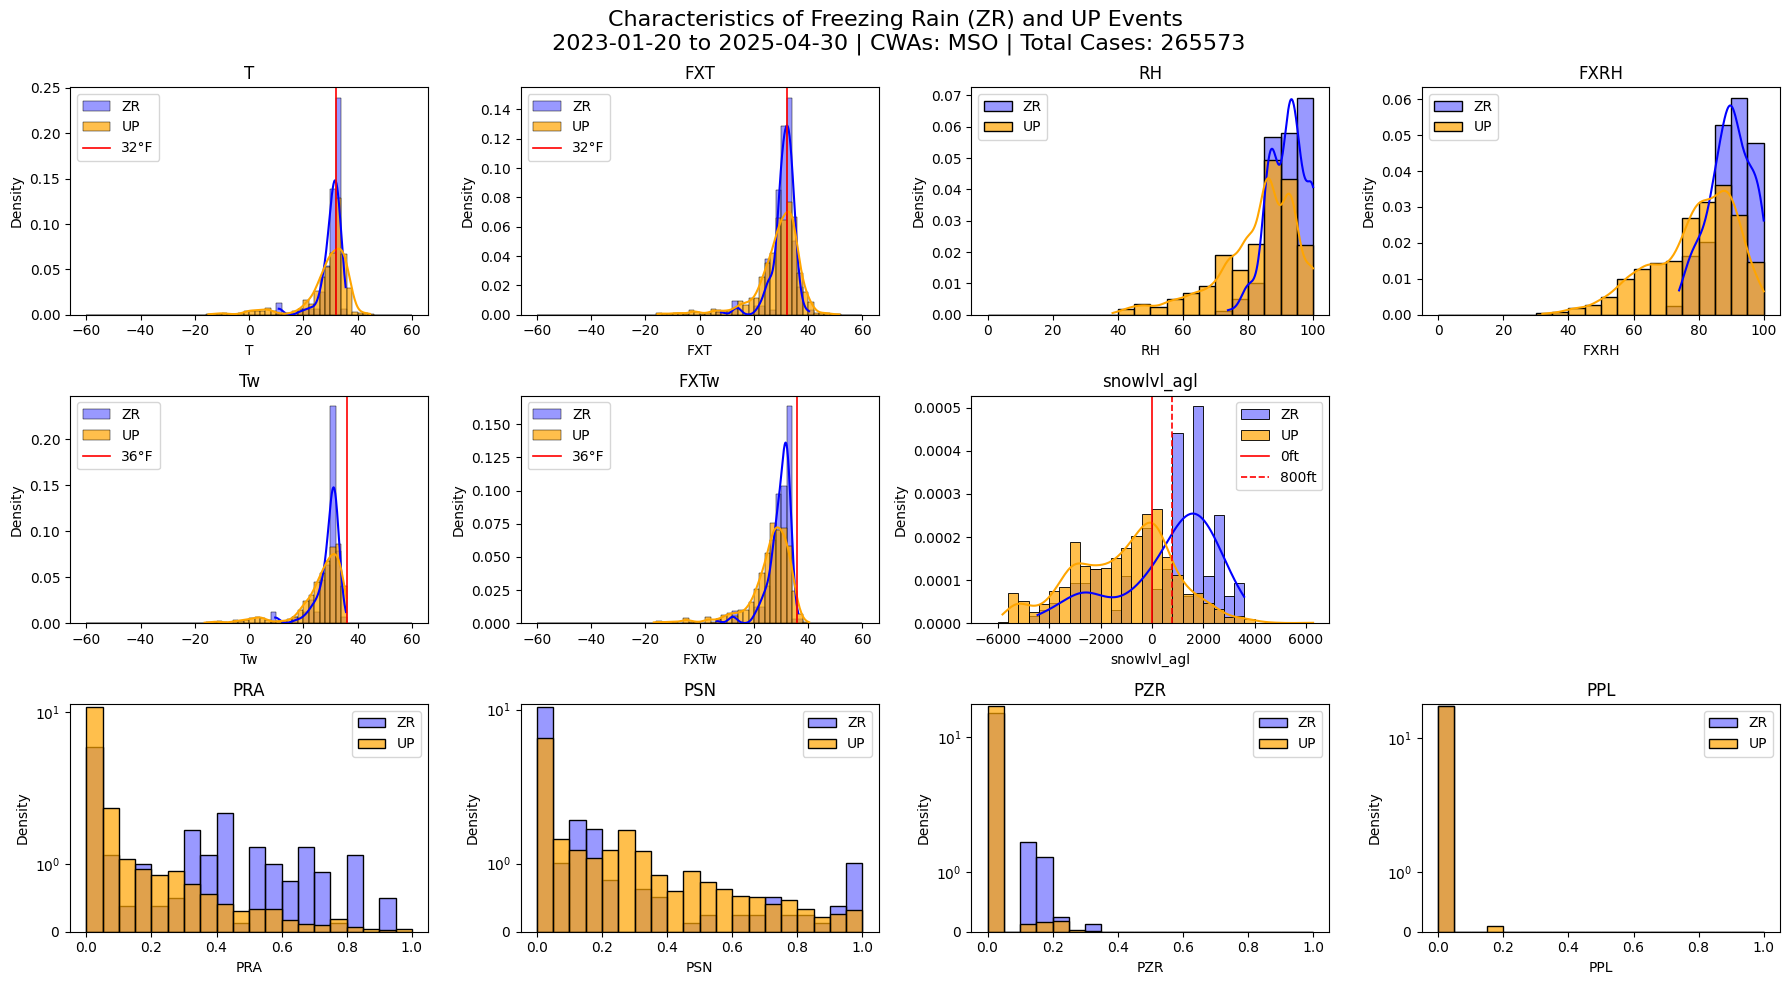

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

cols = [
    'T', 'FXT', 'RH', 'FXRH',            # row 1
    'Tw', 'FXTw', 'snowlvl_agl', None,   # row 2 (None = blank)
    'PRA', 'PSN', 'PZR', 'PPL'           # row 3
]

bin_settings = {
    'T': np.arange(-60, 60+2, 2),
    'FXT': np.arange(-60, 60+2, 2),
    'Tw': np.arange(-60, 60+2, 2),
    'FXTw': np.arange(-60, 60+2, 2),
    'RH': np.arange(0, 100+5, 5),
    'FXRH': np.arange(0, 100+5, 5),
    'snowlvl_agl': np.arange(-6400, 6000+200, 400),
    'PRA': np.arange(0, 1+0.05, 0.05),
    'PSN': np.arange(0, 1+0.05, 0.05),
    'PZR': np.arange(0, 1+0.05, 0.05),
    'PPL': np.arange(0, 1+0.05, 0.05)
}

zr = df[df['ZR'] == True]
zr_up = df[df['UP'] == True]

fig, axes = plt.subplots(3, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    if col is not None:
        bins = bin_settings.get(col, 'auto')
        use_kde = not (col in ['PRA', 'PSN', 'PZR', 'PPL'])
        h1 = sns.histplot(zr[col].dropna(), bins=bins, kde=use_kde, color='blue', label='ZR', ax=ax, stat='density', alpha=0.4)
        h2 = sns.histplot(zr_up[col].dropna(), bins=bins, kde=use_kde, color='orange', label='UP', ax=ax, stat='density', alpha=0.7)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('Density')

        legend_handles = []
        legend_labels = []

        # Add histogram labels only once
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in legend_labels:
                legend_handles.append(handle)
                legend_labels.append(label)

        # Add vertical lines and their legend handles as needed
        if col in ['T', 'FXT']:
            vline = ax.axvline(32, color='red', linestyle='-', linewidth=1.2, label='32°F')
            legend_handles.append(Line2D([0], [0], color='red', linewidth=1.2, linestyle='-', label='32°F'))
            legend_labels.append('32°F')
        if col in ['Tw', 'FXTw']:
            vline = ax.axvline(36, color='red', linestyle='-', linewidth=1.2, label='36°F')
            legend_handles.append(Line2D([0], [0], color='red', linewidth=1.2, linestyle='-', label='36°F'))
            legend_labels.append('36°F')
        if col == 'snowlvl_agl':
            vline0 = ax.axvline(0, color='red', linestyle='-', linewidth=1.2, label='0ft')
            vline800 = ax.axvline(800, color='red', linestyle='--', linewidth=1.2, label='800ft')
            legend_handles.append(Line2D([0], [0], color='red', linewidth=1.2, linestyle='-', label='0ft'))
            legend_labels.append('0ft')
            legend_handles.append(Line2D([0], [0], color='red', linewidth=1.2, linestyle='--', label='800ft'))
            legend_labels.append('800ft')

        if col[0] == 'P':
            ax.set_yscale('symlog')

        ax.legend(handles=legend_handles, labels=legend_labels)
    else:
        ax.axis('off')

if len(cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()

# Update the plot title with the filtered data
# unique_cwas = ", ".join(cwa_selection) if cwa_selection else "All CWAs"
unique_cwas = cwa_selection if cwa_selection else "All CWAs"
case_count = len(df)

plot_title = (f"Characteristics of Freezing Rain (ZR) and UP Events\n {start_date} to {end_date} | CWAs: {unique_cwas} | Total Cases: {case_count}")

plt.suptitle(plot_title, fontsize=16)
plt.tight_layout()

plt.show()

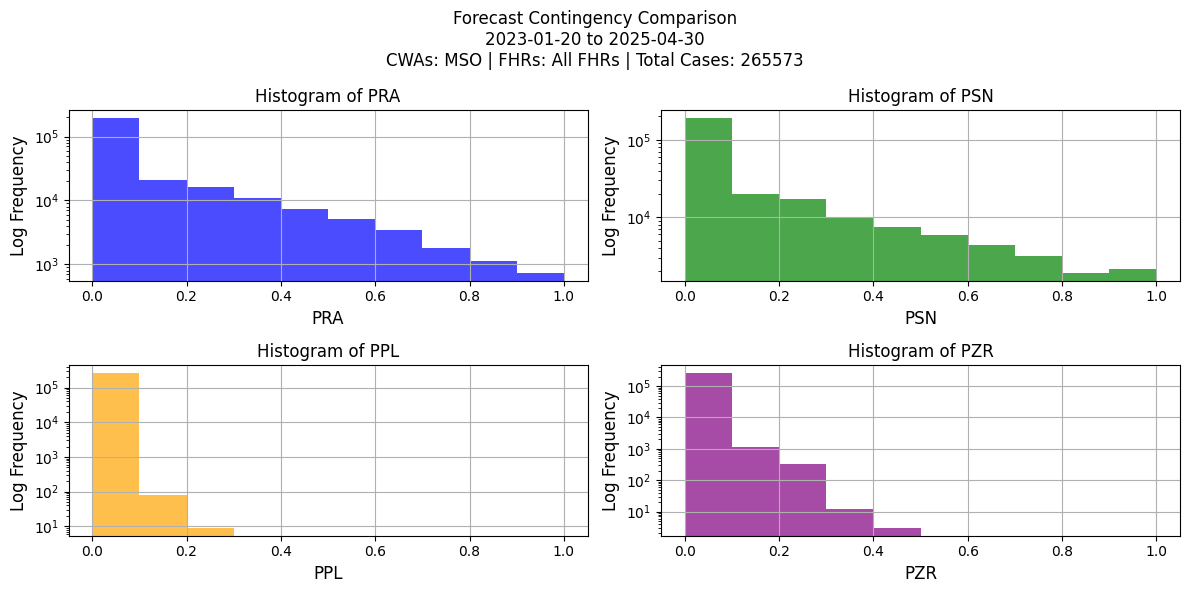

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the font size variable
font_size = 12

# Assuming `df` is your DataFrame
# Drop NaN values from the relevant columns before plotting
df = df.dropna()

# Create bins from 0 to 100 with a step of 10
bins = np.arange(0, 1.1, .1)

# Create a figure for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Set global font size for ticks
plt.rc('xtick', labelsize=font_size)  # Set font size for x-ticks
plt.rc('ytick', labelsize=font_size)  # Set font size for y-ticks

# Plot histogram for PRA
axes[0, 0].hist(df['PRA'], bins=bins, color='blue', alpha=0.7, log=True)
axes[0, 0].set_title('Histogram of PRA', fontsize=font_size)
axes[0, 0].set_xlabel('PRA', fontsize=font_size)
axes[0, 0].set_ylabel('Log Frequency', fontsize=font_size)
axes[0, 0].grid(True)

# Plot histogram for PSN
axes[0, 1].hist(df['PSN'], bins=bins, color='green', alpha=0.7, log=True)
axes[0, 1].set_title('Histogram of PSN', fontsize=font_size)
axes[0, 1].set_xlabel('PSN', fontsize=font_size)
axes[0, 1].set_ylabel('Log Frequency', fontsize=font_size)
axes[0, 1].grid(True)

# Plot histogram for PPL
axes[1, 0].hist(df['PPL'], bins=bins, color='orange', alpha=0.7, log=True)
axes[1, 0].set_title('Histogram of PPL', fontsize=font_size)
axes[1, 0].set_xlabel('PPL', fontsize=font_size)
axes[1, 0].set_ylabel('Log Frequency', fontsize=font_size)
axes[1, 0].grid(True)

# Plot histogram for PZR
axes[1, 1].hist(df['PZR'], bins=bins, color='purple', alpha=0.7, log=True)
axes[1, 1].set_title('Histogram of PZR', fontsize=font_size)
axes[1, 1].set_xlabel('PZR', fontsize=font_size)
axes[1, 1].set_ylabel('Log Frequency', fontsize=font_size)
axes[1, 1].grid(True)

# Gather info for the title
unique_cwas = cwa_selection if cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if fhr_selection else "All FHRs"
case_count = len(df)

plot_title = (
    f"Forecast Contingency Comparison\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Cases: {case_count}"
)

plt.suptitle(plot_title, fontsize=font_size)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

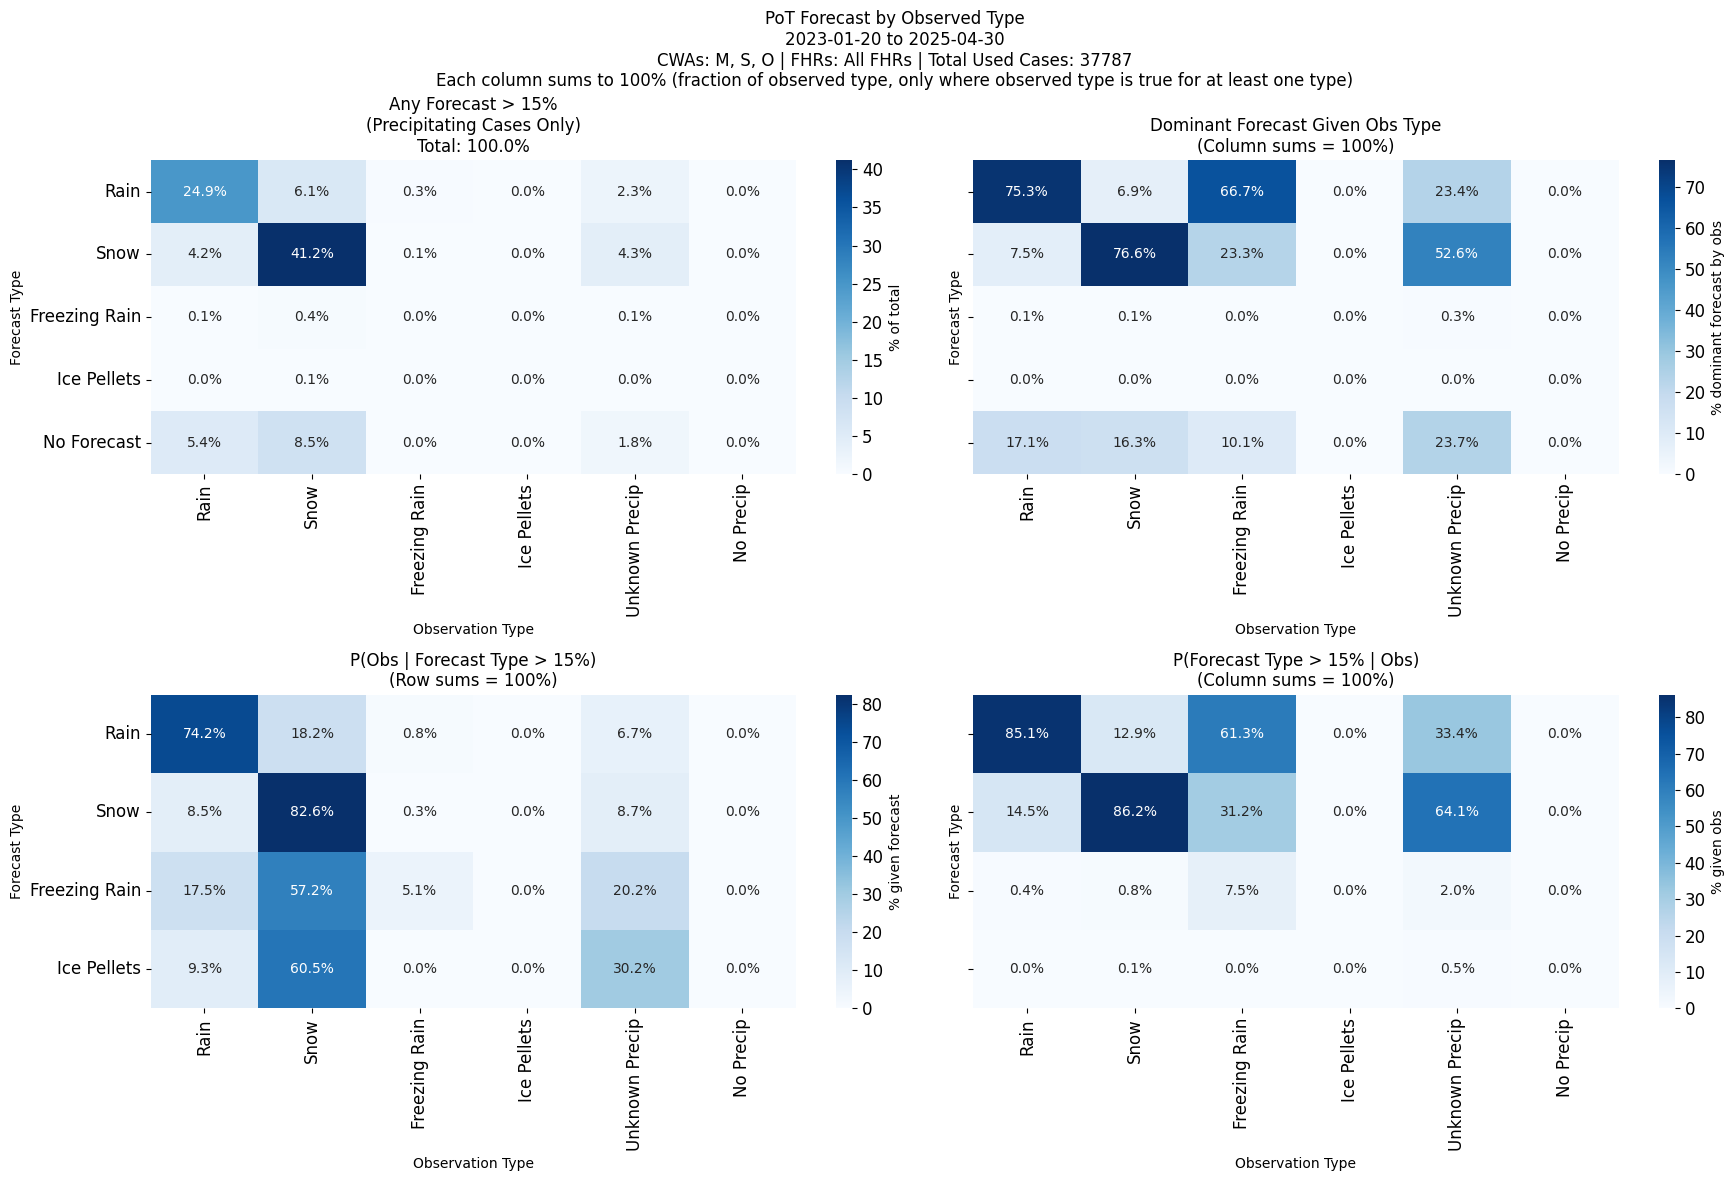

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- USER SETTINGS ----
forecast_cols = ['PRA', 'PSN', 'PZR', 'PPL']
obs_cols = ['RA', 'SN', 'ZR', 'PL', 'UP']
precip_only = True
threshold = 0.15

phenomena_label_map = {
    'PRA': 'Rain',
    'PSN': 'Snow',
    'PZR': 'Freezing Rain',
    'PPL': 'Ice Pellets',
    'RA': 'Rain',
    'SN': 'Snow',
    'ZR': 'Freezing Rain',
    'PL': 'Ice Pellets',
    'UP': 'Unknown Precip',
    'None': 'No Precip',
    'NoForecast': 'No Forecast'
}

forecast_order = ['PRA', 'PSN', 'PZR', 'PPL', 'NoForecast']
obs_order = ['RA', 'SN', 'ZR', 'PL', 'UP', 'None']
forecast_label_order = [phenomena_label_map[k] for k in forecast_order]
obs_label_order = [phenomena_label_map[k] for k in obs_order]

# ---- FILTER FOR PRECIPITATION ----
if precip_only:
    filtered_df = df[df[obs_cols].any(axis=1)]
else:
    filtered_df = df

# ---- OBSERVATION LABELS ----
obs_array = filtered_df[obs_cols].values.astype(bool)
first_true_idx = obs_array.argmax(axis=1)
has_true = obs_array.any(axis=1)
obs_types = np.array(obs_cols)[first_true_idx]
obs_types[~has_true] = "None"

# ---- LEFT: VECTORIZED CONTINGENCY TABLE FOR ALL FCSTS > threshold, INCLUDING NO FORECAST ----
fcst_probs = filtered_df[forecast_cols].values
above_thresh = fcst_probs > threshold

obs_types_repeated = np.repeat(obs_types, above_thresh.shape[1])
forecast_types_tiled = np.tile(np.array(forecast_cols), above_thresh.shape[0])
hits_mask = above_thresh.flatten()

df_hits = pd.DataFrame({
    "Forecast": forecast_types_tiled[hits_mask],
    "Observation": obs_types_repeated[hits_mask]
})

no_forecast_mask = ~above_thresh.any(axis=1)
df_noforecast = pd.DataFrame({
    "Forecast": np.repeat("NoForecast", no_forecast_mask.sum()),
    "Observation": obs_types[no_forecast_mask]
})

df_all = pd.concat([df_hits, df_noforecast], ignore_index=True)
ct = pd.crosstab(df_all["Forecast"], df_all["Observation"])
ct = ct.reindex(index=forecast_order, columns=obs_order, fill_value=0)
ct_pct = ct / ct.values.sum() * 100
ct_pct.index = [phenomena_label_map[idx] for idx in ct_pct.index]
ct_pct.columns = [phenomena_label_map.get(col, col) for col in ct_pct.columns]
ct_pct = ct_pct.reindex(index=forecast_label_order, columns=obs_label_order, fill_value=0)
annotations = ct_pct.round(1).astype(str) + '%'
left_total = ct_pct.values.sum()

# ---- TOP RIGHT: DOMINANT FORECAST BY OBSERVED TYPE (COLUMN SUMS 100%) ----
dominant_per_obs = pd.DataFrame(0, index=forecast_order, columns=obs_order, dtype=float)
case_count_per_cell = pd.DataFrame(0, index=forecast_order, columns=obs_order, dtype=int)
n_obs_type = pd.Series(0, index=obs_order)

for j, o_col in enumerate(obs_order):
    # Mask for rows where observed type j is present
    if o_col == "None":
        mask = (obs_types == "None")
    else:
        mask = (obs_types == o_col)
    n_obs_type[o_col] = mask.sum()
    if n_obs_type[o_col] == 0:
        continue
    # For these rows, what is the dominant forecast (including NoForecast)
    dom_fcst = np.where(
        (filtered_df[forecast_cols].values[mask].max(axis=1) > threshold),
        np.array(forecast_cols)[filtered_df[forecast_cols].values[mask].argmax(axis=1)],
        "NoForecast"
    )
    for i, f_col in enumerate(forecast_order):
        count = (dom_fcst == f_col).sum()
        dominant_per_obs.loc[f_col, o_col] = 100 * count / n_obs_type[o_col]
        case_count_per_cell.loc[f_col, o_col] = count

dominant_per_obs.index = [phenomena_label_map[idx] for idx in dominant_per_obs.index]
dominant_per_obs.columns = [phenomena_label_map.get(col, col) for col in dominant_per_obs.columns]
dominant_per_obs = dominant_per_obs.reindex(index=forecast_label_order, columns=obs_label_order, fill_value=0)
dom_per_obs_annotations = dominant_per_obs.round(1).astype(str) + '%'

# ---- BOTTOM LEFT: NORMALIZED CONDITIONAL TABLE (row sums to 100%) ----
cond_table = pd.DataFrame(0, index=forecast_order[:-1], columns=obs_order, dtype=float)  # skip NoForecast row
for i, f_col in enumerate(forecast_cols):
    mask = filtered_df[f_col] > threshold
    obs_for_fcst = obs_types[mask.values]
    if len(obs_for_fcst) > 0:
        counts = pd.Series(obs_for_fcst).value_counts()
        for o_col in counts.index:
            cond_table.loc[f_col, o_col] = counts[o_col]
        cond_table.loc[f_col] = cond_table.loc[f_col] / cond_table.loc[f_col].sum() * 100
cond_table.index = [phenomena_label_map[idx] for idx in cond_table.index]
cond_table.columns = [phenomena_label_map.get(col, col) for col in cond_table.columns]
cond_table = cond_table.reindex(index=forecast_label_order[:-1], columns=obs_label_order, fill_value=0)
cond_annotations = cond_table.round(1).astype(str) + '%'

# ---- BOTTOM RIGHT: INVERSE CONDITIONAL TABLE (col sums to 100%) ----
inv_cond_table = pd.DataFrame(0, index=forecast_order[:-1], columns=obs_order, dtype=float)  # skip NoForecast row
for j, o_col in enumerate(obs_cols + ['None']):
    if o_col == 'None':
        mask = ~has_true
    else:
        mask = filtered_df[o_col].astype(bool).values if o_col in filtered_df else (obs_types == o_col)
    if mask.sum() > 0:
        # For these obs, count how often each forecast type was > threshold
        for i, f_col in enumerate(forecast_cols):
            fcst_hit = (filtered_df[f_col][mask] > threshold).sum()
            inv_cond_table.loc[f_col, o_col] = fcst_hit
        # Normalize column to sum to 100%
        inv_cond_table[o_col] = inv_cond_table[o_col] / inv_cond_table[o_col].sum() * 100 if inv_cond_table[o_col].sum() > 0 else 0
inv_cond_table.index = [phenomena_label_map[idx] for idx in inv_cond_table.index]
inv_cond_table.columns = [phenomena_label_map.get(col, col) for col in inv_cond_table.columns]
inv_cond_table = inv_cond_table.reindex(index=forecast_label_order[:-1], columns=obs_label_order, fill_value=0)
inv_cond_annotations = inv_cond_table.round(1).astype(str) + '%'

# ---- PLOT 2x2 ----
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey='row')
# Top left: original (any forecast above threshold)
sns.heatmap(ct_pct, annot=annotations, fmt='', cmap='Blues', cbar_kws={'label': '% of total'}, ax=axes[0,0])
axes[0,0].set_xlabel('Observation Type')
axes[0,0].set_ylabel('Forecast Type')
axes[0,0].set_title(
    f'Any Forecast > {int(threshold*100)}%' +
    (f'\n(Precipitating Cases Only)' if precip_only else '') +
    f'\nTotal: {left_total:.1f}%'
)
axes[0,0].tick_params(axis='y', labelrotation=0)
# Top right: dominant forecast conditional on observed type (col sums 100%)
sns.heatmap(dominant_per_obs, annot=dom_per_obs_annotations, fmt='', cmap='Blues', cbar_kws={'label': '% dominant forecast by obs'}, ax=axes[0,1])
axes[0,1].set_xlabel('Observation Type')
axes[0,1].set_ylabel('Forecast Type')
axes[0,1].set_title('Dominant Forecast Given Obs Type\n(Column sums = 100%)')
axes[0,1].tick_params(axis='y', labelrotation=0)
# Bottom left: conditional % (row sums to 100%)
sns.heatmap(cond_table, annot=cond_annotations, fmt='', cmap='Blues', cbar_kws={'label': '% given forecast'}, ax=axes[1,0])
axes[1,0].set_xlabel('Observation Type')
axes[1,0].set_ylabel('Forecast Type')
axes[1,0].set_title('P(Obs | Forecast Type > 15%)\n(Row sums = 100%)')
axes[1,0].tick_params(axis='y', labelrotation=0)
# Bottom right: inverse conditional % (col sums to 100%)
sns.heatmap(inv_cond_table, annot=inv_cond_annotations, fmt='', cmap='Blues', cbar_kws={'label': '% given obs'}, ax=axes[1,1])
axes[1,1].set_xlabel('Observation Type')
axes[1,1].set_ylabel('Forecast Type')
axes[1,1].set_title('P(Forecast Type > 15% | Obs)\n(Column sums = 100%)')
axes[1,1].tick_params(axis='y', labelrotation=0)

# Gather info for the title
unique_cwas = ", ".join(cwa_selection) if 'cwa_selection' in locals() and cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if 'fhr_selection' in locals() and fhr_selection else "All FHRs"
case_count = len(df_all)

plot_title = (
    f"PoT Forecast by Observed Type\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Used Cases: {case_count}\n"
    f"Each column sums to 100% (fraction of observed type, only where observed type is true for at least one type)"
)

fig.suptitle(plot_title)

plt.tight_layout()
plt.show()

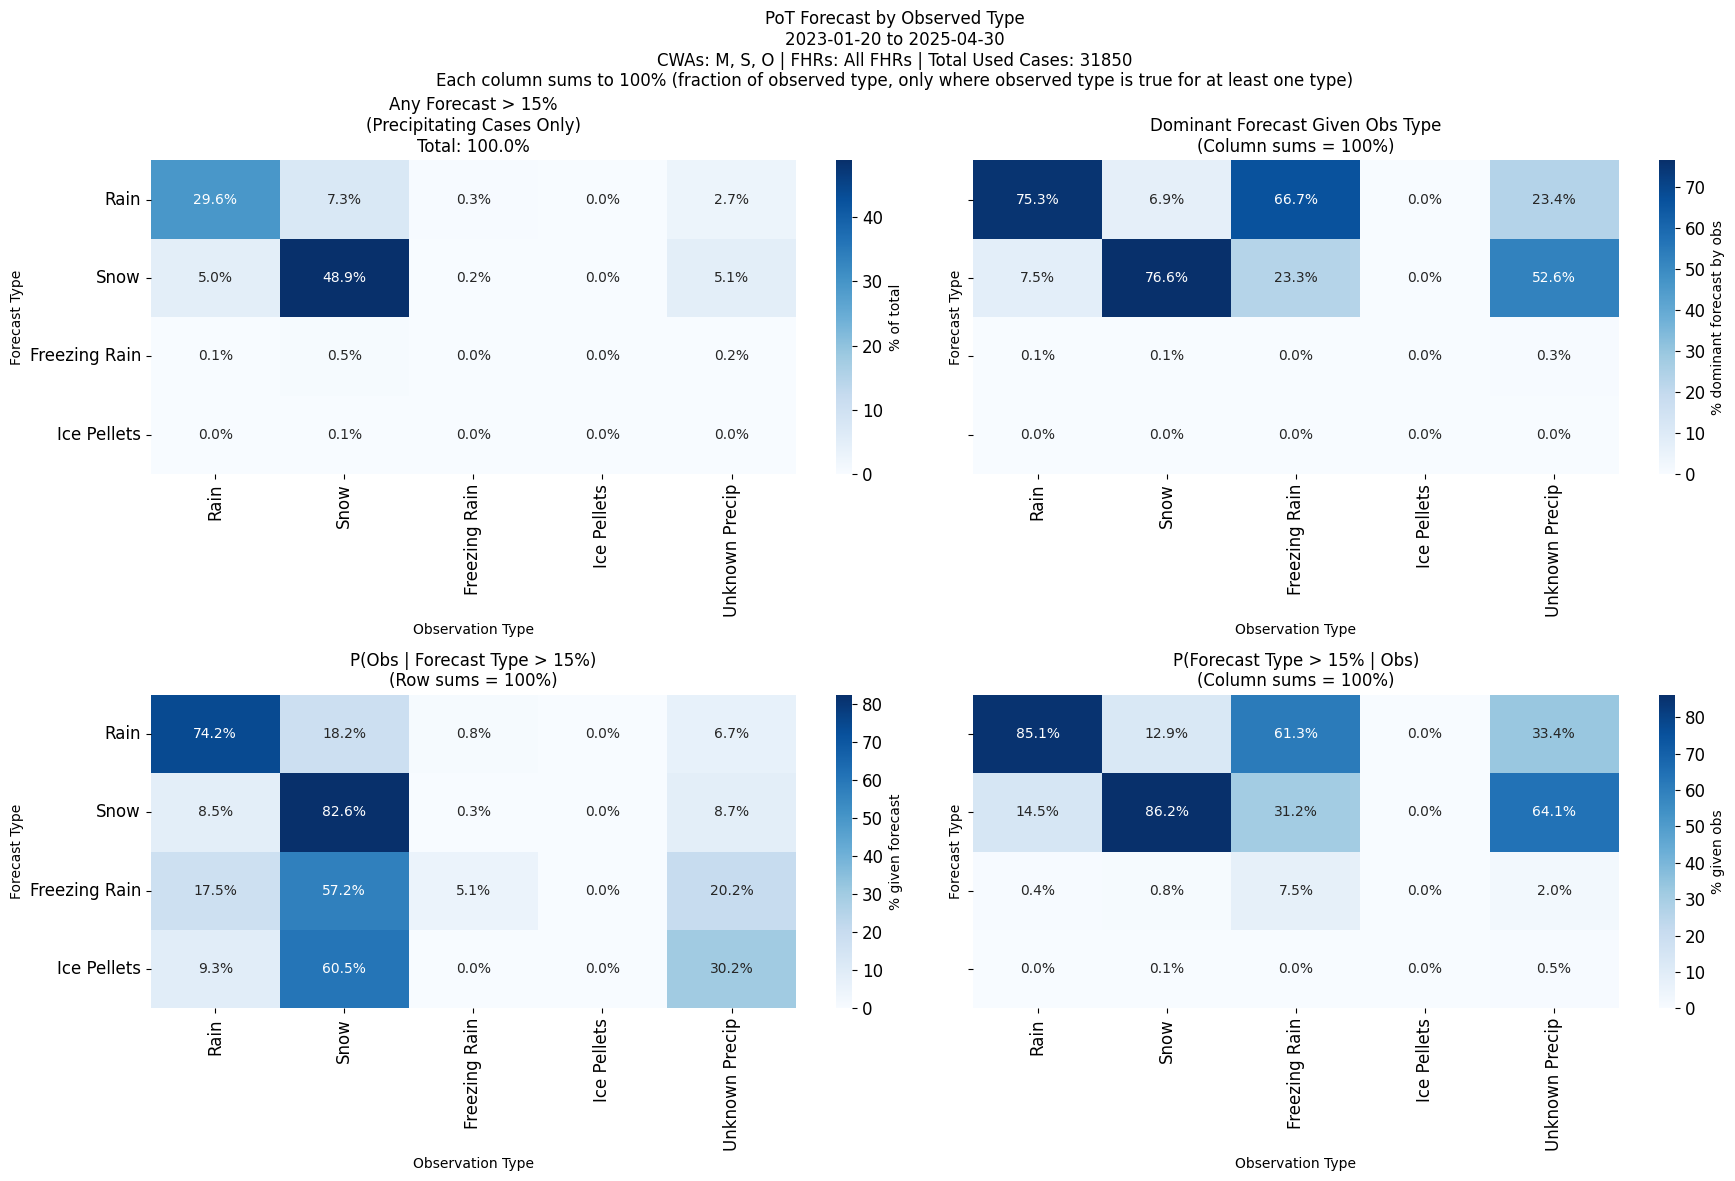

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- USER SETTINGS ----
forecast_cols = ['PRA', 'PSN', 'PZR', 'PPL']
obs_cols = ['RA', 'SN', 'ZR', 'PL', 'UP']
precip_only = True
threshold = 0.15

phenomena_label_map = {
    'PRA': 'Rain',
    'PSN': 'Snow',
    'PZR': 'Freezing Rain',
    'PPL': 'Ice Pellets',
    'RA': 'Rain',
    'SN': 'Snow',
    'ZR': 'Freezing Rain',
    'PL': 'Ice Pellets',
    'UP': 'Unknown Precip',
    'None': 'No Precip',
    'NoForecast': 'No Forecast'
}

forecast_order = ['PRA', 'PSN', 'PZR', 'PPL']  # Removed 'NoForecast'
obs_order = ['RA', 'SN', 'ZR', 'PL', 'UP']     # Removed 'None'
forecast_label_order = [phenomena_label_map[k] for k in forecast_order]
obs_label_order = [phenomena_label_map[k] for k in obs_order]

# ---- FILTER FOR PRECIPITATION ----
if precip_only:
    filtered_df = df[df[obs_cols].any(axis=1)]
else:
    filtered_df = df

# ---- OBSERVATION LABELS ----
obs_array = filtered_df[obs_cols].values.astype(bool)
first_true_idx = obs_array.argmax(axis=1)
has_true = obs_array.any(axis=1)
obs_types = np.array(obs_cols)[first_true_idx]
obs_types[~has_true] = "None"

# Only keep rows where obs_types is in obs_order (i.e., not "None")
keep_mask = np.isin(obs_types, obs_order)
filtered_df = filtered_df.iloc[keep_mask].reset_index(drop=True)
obs_types = obs_types[keep_mask]

# ---- LEFT: VECTORIZED CONTINGENCY TABLE FOR ALL FCSTS > threshold, REMOVED NO FORECAST ----
fcst_probs = filtered_df[forecast_cols].values
above_thresh = fcst_probs > threshold

obs_types_repeated = np.repeat(obs_types, above_thresh.shape[1])
forecast_types_tiled = np.tile(np.array(forecast_cols), above_thresh.shape[0])
hits_mask = above_thresh.flatten()

df_hits = pd.DataFrame({
    "Forecast": forecast_types_tiled[hits_mask],
    "Observation": obs_types_repeated[hits_mask]
})

df_all = df_hits  # Only hits, no "NoForecast"

ct = pd.crosstab(df_all["Forecast"], df_all["Observation"])
ct = ct.reindex(index=forecast_order, columns=obs_order, fill_value=0)
ct_pct = ct / ct.values.sum() * 100
ct_pct.index = [phenomena_label_map[idx] for idx in ct_pct.index]
ct_pct.columns = [phenomena_label_map.get(col, col) for col in ct_pct.columns]
ct_pct = ct_pct.reindex(index=forecast_label_order, columns=obs_label_order, fill_value=0)
annotations = ct_pct.round(1).astype(str) + '%'
left_total = ct_pct.values.sum()

# ---- TOP RIGHT: DOMINANT FORECAST BY OBSERVED TYPE (COLUMN SUMS 100%) ----
dominant_per_obs = pd.DataFrame(0, index=forecast_order, columns=obs_order, dtype=float)
case_count_per_cell = pd.DataFrame(0, index=forecast_order, columns=obs_order, dtype=int)
n_obs_type = pd.Series(0, index=obs_order)

for j, o_col in enumerate(obs_order):  # only real obs, not None
    mask = (obs_types == o_col)
    n_obs_type[o_col] = mask.sum()
    if n_obs_type[o_col] == 0:
        continue
    fcst_probs_slice = filtered_df[forecast_cols].values[mask]
    dom_fcst = np.where(
        (fcst_probs_slice.max(axis=1) > threshold),
        np.array(forecast_cols)[fcst_probs_slice.argmax(axis=1)],
        "NoForecast"
    )
    # Only count if dom_fcst is in forecast_order (not "NoForecast")
    for i, f_col in enumerate(forecast_order):
        count = (dom_fcst == f_col).sum()
        dominant_per_obs.loc[f_col, o_col] = 100 * count / n_obs_type[o_col] if n_obs_type[o_col] else 0
        case_count_per_cell.loc[f_col, o_col] = count

dominant_per_obs.index = [phenomena_label_map[idx] for idx in dominant_per_obs.index]
dominant_per_obs.columns = [phenomena_label_map.get(col, col) for col in dominant_per_obs.columns]
dominant_per_obs = dominant_per_obs.reindex(index=forecast_label_order, columns=obs_label_order, fill_value=0)
dom_per_obs_annotations = dominant_per_obs.round(1).astype(str) + '%'

# ---- BOTTOM LEFT: NORMALIZED CONDITIONAL TABLE (row sums to 100%) ----
cond_table = pd.DataFrame(0, index=forecast_order, columns=obs_order, dtype=float)
for i, f_col in enumerate(forecast_cols):
    mask = filtered_df[f_col] > threshold
    obs_for_fcst = obs_types[mask.values]
    # Only keep obs_for_fcst that are in obs_order
    obs_for_fcst = obs_for_fcst[np.isin(obs_for_fcst, obs_order)]
    if len(obs_for_fcst) > 0:
        counts = pd.Series(obs_for_fcst).value_counts()
        for o_col in counts.index:
            cond_table.loc[f_col, o_col] = counts[o_col]
        cond_table.loc[f_col] = cond_table.loc[f_col] / cond_table.loc[f_col].sum() * 100
cond_table.index = [phenomena_label_map[idx] for idx in cond_table.index]
cond_table.columns = [phenomena_label_map.get(col, col) for col in cond_table.columns]
cond_table = cond_table.reindex(index=forecast_label_order, columns=obs_label_order, fill_value=0)
cond_annotations = cond_table.round(1).astype(str) + '%'

# ---- BOTTOM RIGHT: INVERSE CONDITIONAL TABLE (col sums to 100%) ----
inv_cond_table = pd.DataFrame(0, index=forecast_order, columns=obs_order, dtype=float)
for j, o_col in enumerate(obs_cols):  # only real obs, not 'None'
    mask = filtered_df[o_col].astype(bool).values if o_col in filtered_df else (obs_types == o_col)
    if mask.sum() > 0:
        for i, f_col in enumerate(forecast_cols):
            fcst_hit = (filtered_df[f_col][mask] > threshold).sum()
            inv_cond_table.loc[f_col, o_col] = fcst_hit
        inv_cond_table[o_col] = inv_cond_table[o_col] / inv_cond_table[o_col].sum() * 100 if inv_cond_table[o_col].sum() > 0 else 0
inv_cond_table.index = [phenomena_label_map[idx] for idx in inv_cond_table.index]
inv_cond_table.columns = [phenomena_label_map.get(col, col) for col in inv_cond_table.columns]
inv_cond_table = inv_cond_table.reindex(index=forecast_label_order, columns=obs_label_order, fill_value=0)
inv_cond_annotations = inv_cond_table.round(1).astype(str) + '%'

# ---- PLOT 2x2 ----
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey='row')
# Top left: original (any forecast above threshold)
sns.heatmap(ct_pct, annot=annotations, fmt='', cmap='Blues', cbar_kws={'label': '% of total'}, ax=axes[0,0])
axes[0,0].set_xlabel('Observation Type')
axes[0,0].set_ylabel('Forecast Type')
axes[0,0].set_title(
    f'Any Forecast > {int(threshold*100)}%' +
    (f'\n(Precipitating Cases Only)' if precip_only else '') +
    f'\nTotal: {left_total:.1f}%'
)
axes[0,0].tick_params(axis='y', labelrotation=0)
# Top right: dominant forecast conditional on observed type (col sums 100%)
sns.heatmap(dominant_per_obs, annot=dom_per_obs_annotations, fmt='', cmap='Blues', cbar_kws={'label': '% dominant forecast by obs'}, ax=axes[0,1])
axes[0,1].set_xlabel('Observation Type')
axes[0,1].set_ylabel('Forecast Type')
axes[0,1].set_title('Dominant Forecast Given Obs Type\n(Column sums = 100%)')
axes[0,1].tick_params(axis='y', labelrotation=0)
# Bottom left: conditional % (row sums to 100%)
sns.heatmap(cond_table, annot=cond_annotations, fmt='', cmap='Blues', cbar_kws={'label': '% given forecast'}, ax=axes[1,0])
axes[1,0].set_xlabel('Observation Type')
axes[1,0].set_ylabel('Forecast Type')
axes[1,0].set_title('P(Obs | Forecast Type > 15%)\n(Row sums = 100%)')
axes[1,0].tick_params(axis='y', labelrotation=0)
# Bottom right: inverse conditional % (col sums to 100%)
sns.heatmap(inv_cond_table, annot=inv_cond_annotations, fmt='', cmap='Blues', cbar_kws={'label': '% given obs'}, ax=axes[1,1])
axes[1,1].set_xlabel('Observation Type')
axes[1,1].set_ylabel('Forecast Type')
axes[1,1].set_title('P(Forecast Type > 15% | Obs)\n(Column sums = 100%)')
axes[1,1].tick_params(axis='y', labelrotation=0)

# Gather info for the title
unique_cwas = ", ".join(cwa_selection) if 'cwa_selection' in locals() and cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if 'fhr_selection' in locals() and fhr_selection else "All FHRs"
case_count = len(df_all)

plot_title = (
    f"PoT Forecast by Observed Type\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Used Cases: {case_count}\n"
    f"Each column sums to 100% (fraction of observed type, only where observed type is true for at least one type)"
)

fig.suptitle(plot_title)

plt.tight_layout()
plt.show()

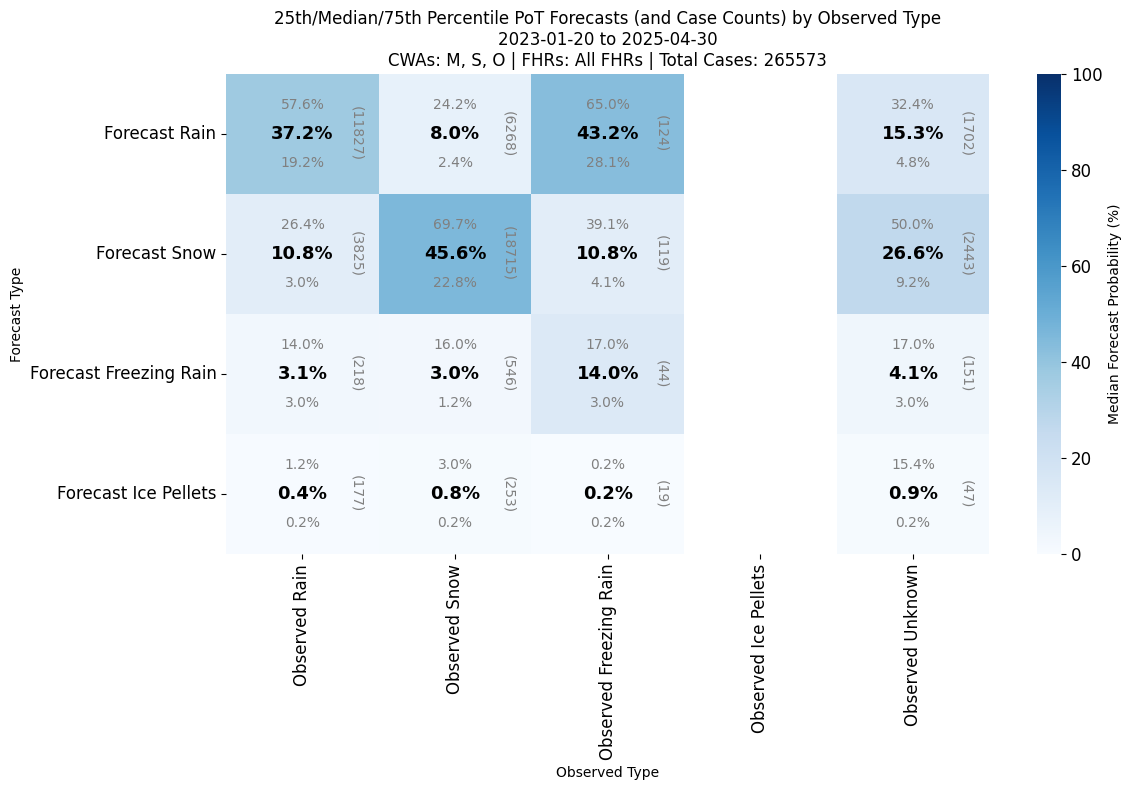

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Toggle: plot_median_forecast_prob_percent ---
plot_median_forecast_prob_percent = True

# --- Define categories and keys ---
category_names = ['Rain', 'Snow', 'Freezing Rain', 'Ice Pellets']
forecast_keys = ['PRA', 'PSN', 'PZR', 'PPL']
observed_names = ['Rain', 'Snow', 'Freezing Rain', 'Ice Pellets', 'Unknown']
observed_keys = ['RA', 'SN', 'ZR', 'PL', 'UP']

# Use all rows (do not filter out "No Forecast" but we won't compute that row)
df_ct = df.copy()

if plot_median_forecast_prob_percent:
    n_forecast = len(forecast_keys)
    n_obs = len(observed_keys)
    matrix_median = np.full((n_forecast, n_obs), np.nan)
    matrix_p25 = np.full((n_forecast, n_obs), np.nan)
    matrix_p75 = np.full((n_forecast, n_obs), np.nan)
    matrix_count = np.full((n_forecast, n_obs), np.nan)
    for obs_idx, obs_key in enumerate(observed_keys):
        mask_obs = df_ct[obs_key] > 0.15
        df_obs = df_ct[mask_obs]
        for fcst_idx, fcst_key in enumerate(forecast_keys):
            mask_fcst = df_obs[fcst_key] > 0
            values = df_obs.loc[mask_fcst, fcst_key]
            if len(values) > 0:
                matrix_median[fcst_idx, obs_idx] = np.median(values) * 100
                matrix_p25[fcst_idx, obs_idx] = np.percentile(values, 25) * 100
                matrix_p75[fcst_idx, obs_idx] = np.percentile(values, 75) * 100
                matrix_count[fcst_idx, obs_idx] = len(values)
            else:
                matrix_median[fcst_idx, obs_idx] = np.nan
                matrix_p25[fcst_idx, obs_idx] = np.nan
                matrix_p75[fcst_idx, obs_idx] = np.nan
                matrix_count[fcst_idx, obs_idx] = 0
    fmt = ".1f"
    cbar_label = "Median Forecast Probability (%)"
    plot_title = 'Forecast Probability by Observed Type\n(Median [25th–75th Percentile], case count)'
    vmin, vmax = 0, 100
    percent_sign = True
else:
    pass

row_labels = [f"Forecast {n}" for n in category_names]
contingency_df = pd.DataFrame(
    matrix_median,
    index=row_labels,
    columns=[f"Observed {n}" for n in observed_names]
)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    contingency_df,
    annot=False, fmt=fmt, cmap="Blues", cbar=True,
    ax=ax, cbar_kws={'label': cbar_label},
    vmin=vmin, vmax=vmax
)

# Annotate: median bold, percentiles smaller, gray, not bold, count to the right (vertical)
for i in range(matrix_median.shape[0]):
    for j in range(matrix_median.shape[1]):
        median_val = matrix_median[i, j]
        p25_val = matrix_p25[i, j]
        p75_val = matrix_p75[i, j]
        count_val = int(matrix_count[i, j]) if not np.isnan(matrix_count[i, j]) else 0
        if not np.isnan(median_val):
            ax.text(
                j + 0.5, i + 0.32, f"{p75_val:.1f}%",
                ha='center', va='bottom', fontsize=10, color='gray', fontweight='normal'
            )
            ax.text(
                j + 0.5, i + 0.5, f"{median_val:.1f}%",
                ha='center', va='center', fontsize=13, color='black', fontweight='bold'
            )
            ax.text(
                j + 0.5, i + 0.68, f"{p25_val:.1f}%",
                ha='center', va='top', fontsize=10, color='gray', fontweight='normal'
            )
            # Case count, vertical, to right of median value
            ax.text(
                j + 0.85, i + 0.5, f"({count_val})",
                ha='center', va='center', fontsize=10, color='gray', fontweight='normal', rotation=-90
            )

# Gather info for the title
unique_cwas = ", ".join(cwa_selection) if 'cwa_selection' in locals() and cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if 'fhr_selection' in locals() and fhr_selection else "All FHRs"
case_count = len(df)

plot_title = (
    f"25th/Median/75th Percentile PoT Forecasts (and Case Counts) by Observed Type\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Cases: {case_count}"
)

ax.set_title(plot_title)
ax.set_xlabel("Observed Type")
ax.set_ylabel("Forecast Type")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

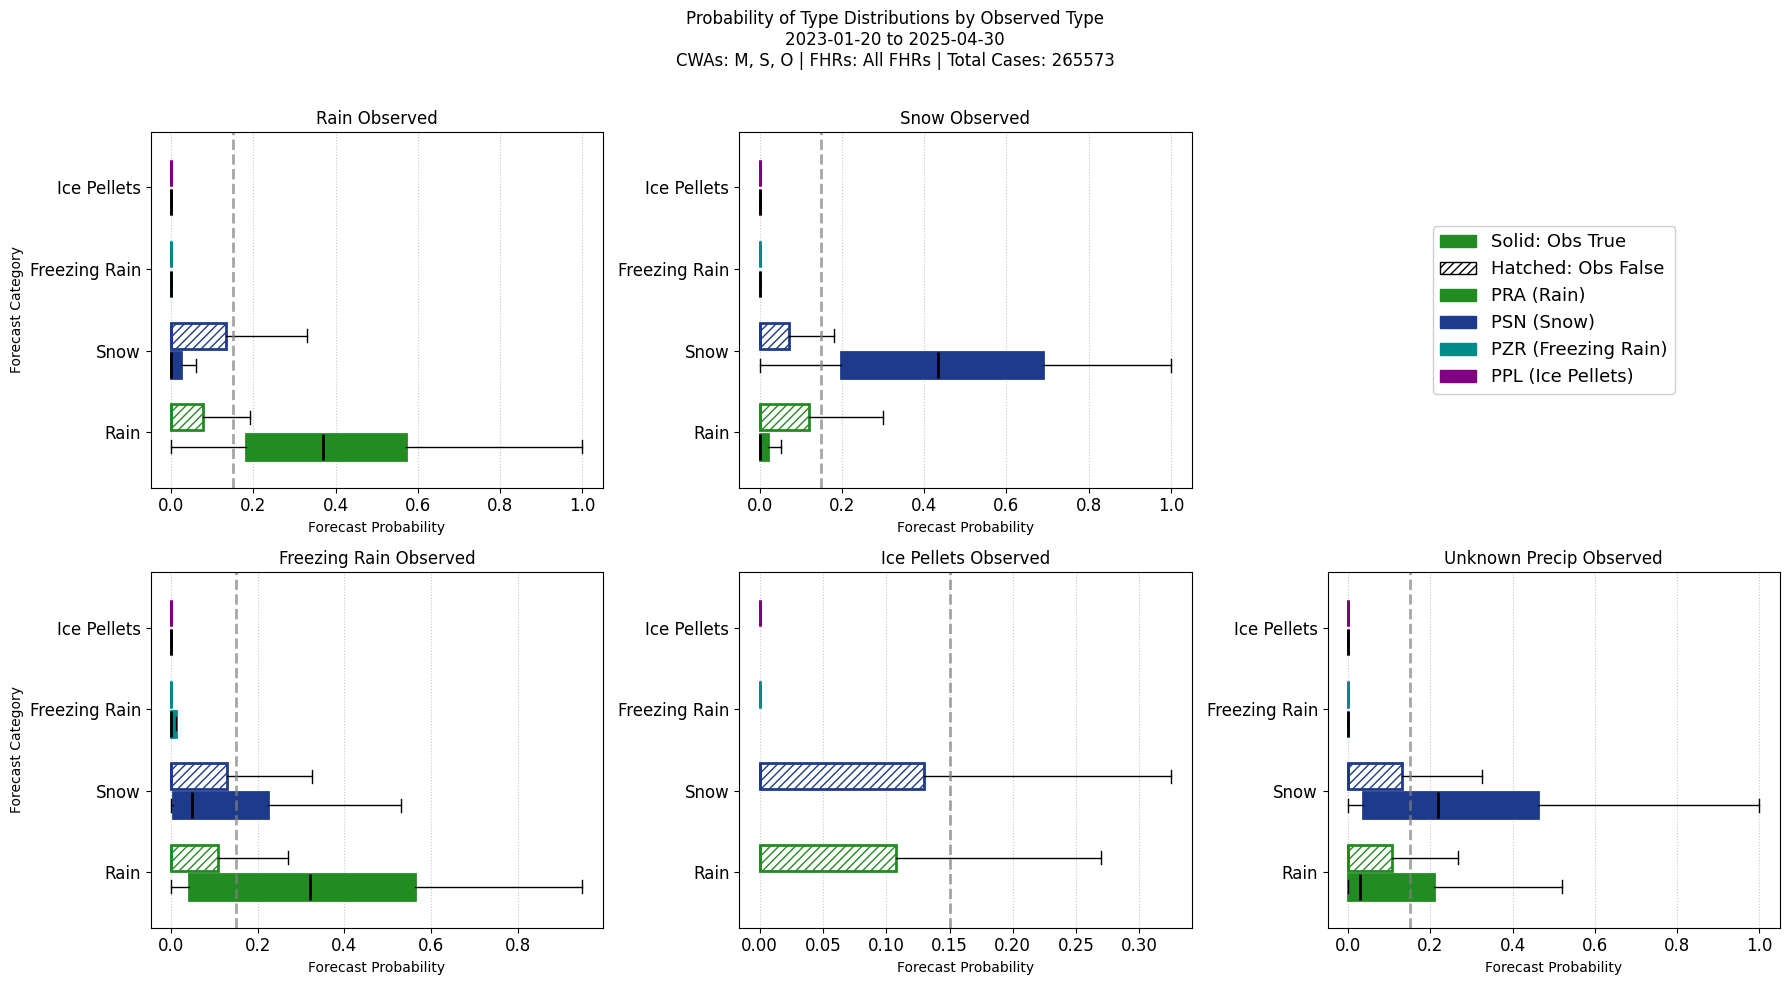

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define keys and colors
forecast_keys = ['PRA', 'PSN', 'PZR', 'PPL']
forecast_names = ['Rain', 'Snow', 'Freezing Rain', 'Ice Pellets']
forecast_colors = {
    'PRA': '#228B22',    # Green
    'PSN': '#1E3A8A',    # Blue
    'PZR': '#008B8B',    # Aqua
    'PPL': '#800080',    # Purple
}
hatch_style = '////'

# Observed types and arrangement (ZR always first in second row)
observed_keys = ['RA', 'SN', 'ZR', 'PL', 'UP']
panel_titles = [
    'Rain Observed', 'Snow Observed',
    'Freezing Rain Observed', 'Ice Pellets Observed', 'Unknown Precip Observed'
]

# Panel arrangement in 2x3 grid: (row, col) for each panel
panel_to_grid = [(0,0), (0,1), (1,0), (1,1), (1,2)]

fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3, height_ratios=[1,1])

axes = []
for idx, (row, col) in enumerate(panel_to_grid):
    ax = plt.subplot(gs[row, col])
    axes.append(ax)

for i, (obs_key, panel_title) in enumerate(zip(observed_keys, panel_titles)):
    ax = axes[i]
    # True: rows where this observation is True
    data_true = [df.loc[df[obs_key]==True, key] for key in forecast_keys]
    # False: rows where this observation is False
    data_false = [df.loc[df[obs_key]==False, key] for key in forecast_keys]
    # Plot solid for True, hatched for False
    for j, key in enumerate(forecast_keys):
        # True, solid
        ax.boxplot(
            [data_true[j]],
            positions=[j-0.18],
            vert=False,
            widths=0.32,
            patch_artist=True,
            boxprops=dict(facecolor=forecast_colors[key], color=forecast_colors[key], linewidth=2),
            medianprops=dict(color='black', linewidth=2),
            showfliers=False
        )
        # False, hatched
        ax.boxplot(
            [data_false[j]],
            positions=[j+0.18],
            vert=False,
            widths=0.32,
            patch_artist=True,
            boxprops=dict(facecolor='white', color=forecast_colors[key], linewidth=2, hatch=hatch_style),
            medianprops=dict(color=forecast_colors[key], linewidth=2),
            showfliers=False
        )
    ax.set_yticks(range(len(forecast_keys)))
    ax.set_yticklabels(forecast_names)
    ax.set_title(panel_title)
    ax.set_xlabel('Forecast Probability')
    if i in [0, 2]:  # First column of each row
        ax.set_ylabel('Forecast Category')
    else:
        ax.set_ylabel("")
    ax.grid(axis='x', linestyle=':', alpha=0.7)
    ax.axvline(0.15, color='gray', linestyle='--', linewidth=2, alpha=0.7)

# Legend in the upper right empty panel (gs[0,2])
legend_ax = plt.subplot(gs[0,2])
legend_ax.axis('off')
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=forecast_colors['PRA'], edgecolor=forecast_colors['PRA'], label='Solid: Obs True'),
    Patch(facecolor='white', edgecolor='black', hatch=hatch_style, label='Hatched: Obs False'),
    Patch(facecolor=forecast_colors['PRA'], edgecolor=forecast_colors['PRA'], label='PRA (Rain)'),
    Patch(facecolor=forecast_colors['PSN'], edgecolor=forecast_colors['PSN'], label='PSN (Snow)'),
    Patch(facecolor=forecast_colors['PZR'], edgecolor=forecast_colors['PZR'], label='PZR (Freezing Rain)'),
    Patch(facecolor=forecast_colors['PPL'], edgecolor=forecast_colors['PPL'], label='PPL (Ice Pellets)'),
]
legend = legend_ax.legend(
    handles=legend_elements,
    loc='center',
    fontsize=13,
    frameon=True,
    framealpha=0.95
)

# Gather info for the title
unique_cwas = ", ".join(cwa_selection) if cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if fhr_selection else "All FHRs"
case_count = len(df)

plot_title = (
    f"Probability of Type Distributions by Observed Type\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Cases: {case_count}"
)

fig.suptitle(plot_title)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<ipython-input-22-bedaa7d75016>:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


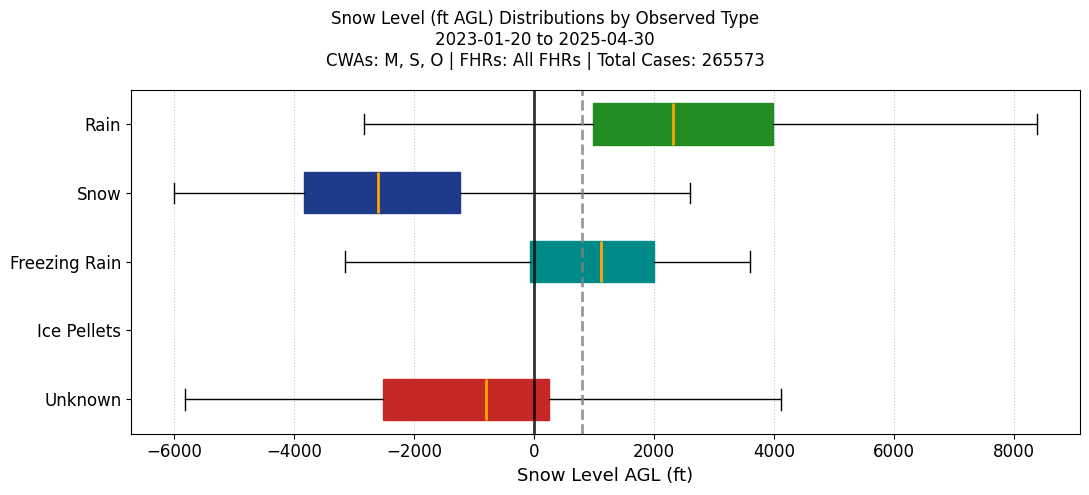

In [ ]:
import matplotlib.pyplot as plt

# Set the forecast hour you want, or None for all:
fhr_value = None #24  # Example: 3, 6, 9, etc. Set to None for all

# Observed types and colors (flipped vertical order)
obs_keys = ['UP', 'PL', 'ZR', 'SN', 'RA']
obs_labels = ['Unknown', 'Ice Pellets', 'Freezing Rain', 'Snow', 'Rain']
obs_colors = ['#C62828', '#800080', '#008B8B', '#1E3A8A', '#228B22']

data = []
for obs_key in obs_keys:
    # First, get the right subset by fhr MultiIndex level
    if fhr_value is not None:
        try:
            subset = df.xs(fhr_value, level='fhr')
        except KeyError:
            subset = df.iloc[0:0] # empty frame
    else:
        subset = df
    subset = subset[subset[obs_key] == True]
    data.append(subset['snowlvl_agl'].dropna())

fig, ax = plt.subplots(figsize=(11, 5))

box = ax.boxplot(
    data,
    vert=False,
    patch_artist=True,
    widths=0.6,
    labels=obs_labels,
    showfliers=False,
    flierprops=dict(marker='o', markerfacecolor='gray', markeredgecolor='black', alpha=0.6, markersize=5)
)

for patch, color in zip(box['boxes'], obs_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
for median in box['medians']:
    median.set_color('orange')
    median.set_linewidth(2)

ax.axvline(0, color='black', linestyle='-', linewidth=2, alpha=0.8)
ax.axvline(800, color='gray', linestyle='--', linewidth=2, alpha=0.8)

ax.set_xlabel("Snow Level AGL (ft)", fontsize=13)
ax.set_yticklabels(obs_labels, fontsize=12)

# Gather info for the title
unique_cwas = ", ".join(cwa_selection) if cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if fhr_selection else "All FHRs"
case_count = len(df)

plot_title = (
    f"Snow Level (ft AGL) Distributions by Observed Type\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Cases: {case_count}"
)

plt.suptitle(plot_title)

ax.grid(axis='x', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

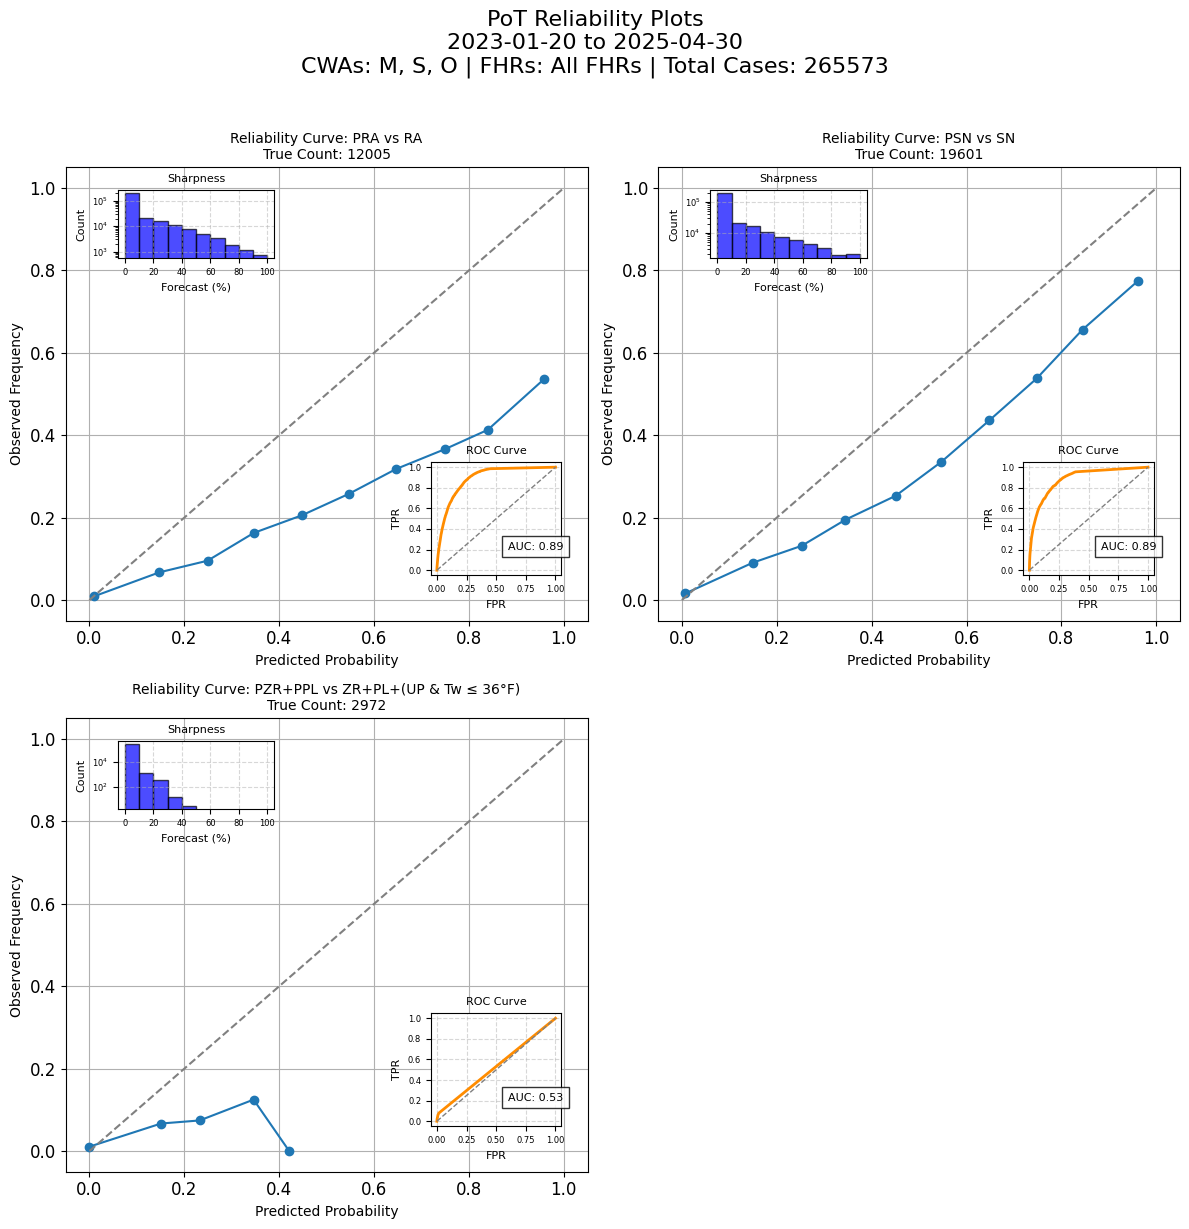

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Limit Tw at which to use UP obs (<=)
tw_up_limit = 36

# Define the probability/boolean verification pairs
pairs = [
    ('PRA', 'RA'),
    ('PSN', 'SN'),
    ('PZR+PPL', 'ZR+PL+UP')  # New combined category for lower-left plot
]

# Create combined category (shared probabilities and observations)
df['PZR+PPL'] = (df['PZR'] + df['PPL'])  # SUM of PZR and PPL
df['ZR+PL+UP'] = df['ZR'] | df['PL'] | ((df['UP'] & (df['Tw'] <= tw_up_limit)))

# Calculate the total number of unique stations from the MultiIndex
total_stations = df.index.get_level_values('stid').nunique()

# Create a figure for the 4-panel plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Loop through the pairs and generate reliability plots with sharpness diagrams and ROC curves
for idx, (prob_col, obs_col) in enumerate(pairs):
    # Extract probabilities and observed booleans
    probabilities = df[prob_col]
    observations = df[obs_col]

    # Compute the calibration curve
    prob_true, prob_pred = calibration_curve(observations, probabilities, n_bins=10, strategy='uniform')

    # Determine the subplot location
    ax = axes[idx // 2, idx % 2]

    # Plot the reliability curve
    ax.plot(prob_pred, prob_true, marker='o', label=None)  # 'Reliability')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Removed label for perfect reliability

    # Count the number of true events for the observed variable
    true_count = observations.sum()

    # Modify the title for the lower-left plot (PZR+PPL vs ZR+PL+UP)
    if prob_col == 'PZR+PPL' and obs_col == 'ZR+PL+UP':
        obs_col_mod = obs_col.replace("UP", f"(UP & Tw \u2264 {tw_up_limit}°F)")
        ax.set_title(
            f'Reliability Curve: {prob_col} vs {obs_col_mod}\nTrue Count: {true_count}',
            fontsize=10
        )
    else:
        # Default title for other plots
        ax.set_title(f'Reliability Curve: {prob_col} vs {obs_col}\nTrue Count: {true_count}', fontsize=10)

    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Observed Frequency')
    # ax.legend()
    ax.grid(True)

    # Add sharpness diagram (histogram) as an inset in the top-left
    sharpness_ax = ax.inset_axes([0.1, 0.8, 0.3, 0.15])  # [x, y, width, height] in relative coordinates
    sharpness_ax.hist(probabilities * 100, bins=np.arange(0, 110, 10), color='blue', alpha=0.7, edgecolor='black')
    sharpness_ax.set_title('Sharpness', fontsize=8)
    sharpness_ax.set_xlabel('Forecast (%)', fontsize=8)
    sharpness_ax.set_ylabel('Count', fontsize=8)
    sharpness_ax.tick_params(axis='both', which='major', labelsize=6)
    sharpness_ax.grid(True, linestyle='--', alpha=0.5)
    sharpness_ax.set_yscale('log')  # Logarithmic scale for y-axis

    # Add ROC curve as an inset in the bottom-right
    roc_ax = ax.inset_axes([0.7, 0.10, 0.25, 0.25])  # [x, y, width, height] in relative coordinates
    fpr, tpr, _ = roc_curve(observations, probabilities)
    auc_score = roc_auc_score(observations, probabilities)
    roc_ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC')
    roc_ax.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)  # Diagonal line
    roc_ax.set_title('ROC Curve', fontsize=8)
    roc_ax.set_xlabel('FPR', fontsize=8)  # False Positive Rate
    roc_ax.set_ylabel('TPR', fontsize=8)  # True Positive Rate
    roc_ax.tick_params(axis='both', which='major', labelsize=6)
    roc_ax.grid(True, linestyle='--', alpha=0.5)
    # Add AUC score to the ROC inset
    roc_ax.text(0.6, 0.2, f'AUC: {auc_score:.2f}', fontsize=8, bbox=dict(facecolor='white', alpha=0.8))

# Hide the bottom-right plot (left as whitespace)
axes[1, 1].axis('off')  # Turn off the bottom-right plot

# Gather info for the title
unique_cwas = ", ".join(cwa_selection) if cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if fhr_selection else "All FHRs"
case_count = len(df)

plot_title = (
    f"PoT Reliability Plots\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Cases: {case_count}"
)

# Add the title to the plot
fig.suptitle(plot_title, fontsize=16, y=1.02)  # Set title above the plots

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

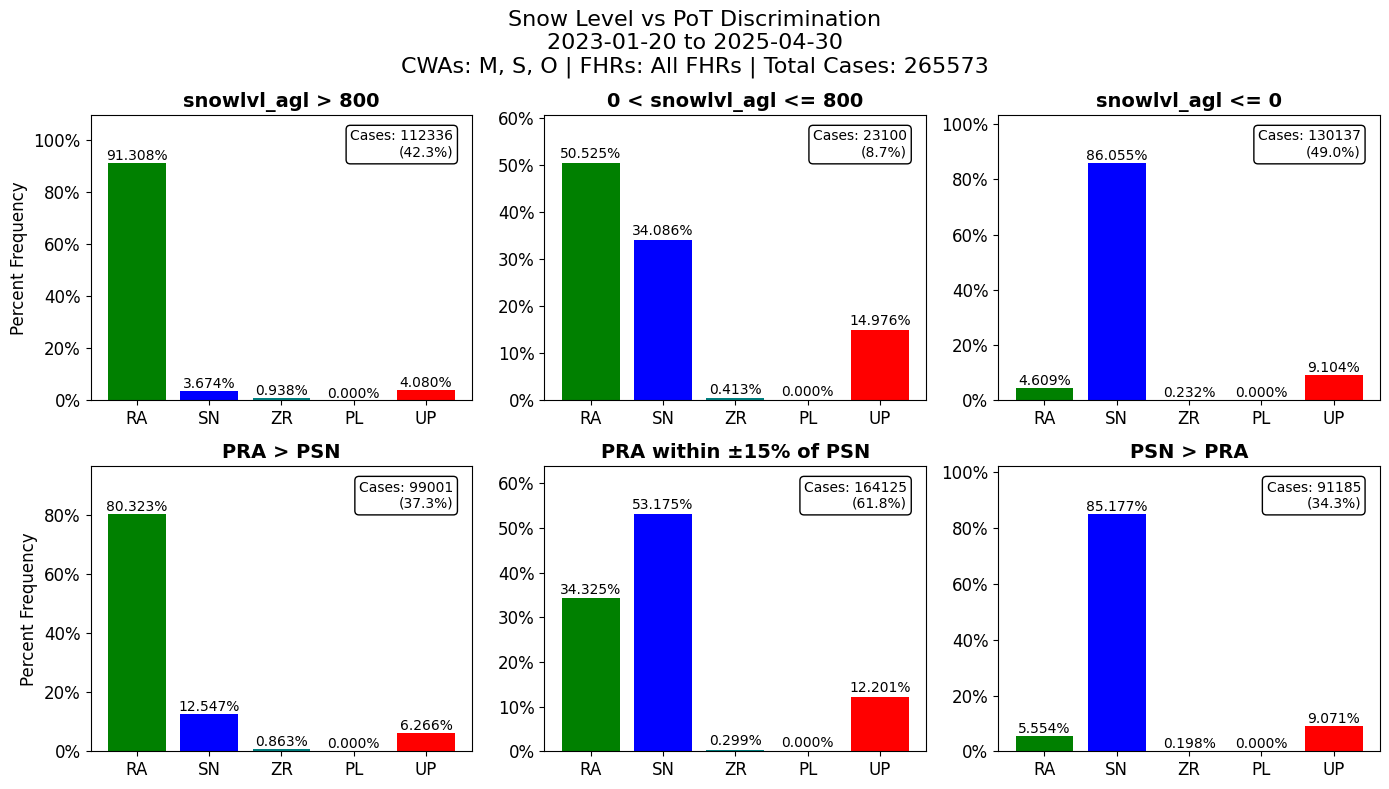

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Assuming `df` is your DataFrame with columns: RA, SN, ZR, PL, UP, PRA, PSN, and snowlvl_agl

# Step 1: Define the thresholds and split the data for the first row
threshold_high = 800
threshold_low = 0

df_high_snowlvl = df[df['snowlvl_agl'] > threshold_high]  # Left panel: snowlvl_agl > 800
df_mid_snowlvl = df[(df['snowlvl_agl'] > threshold_low) & (df['snowlvl_agl'] <= threshold_high)]  # Middle panel: 0 < snowlvl_agl <= 800
df_low_snowlvl = df[df['snowlvl_agl'] <= threshold_low]  # Right panel: snowlvl_agl <= 0

# Step 2: Define the conditions for the second row
df_pra_gt_psn = df[df['PRA'] > df['PSN']]  # Left panel: PRA > PSN
df_pra_within_psn = df[abs(df['PRA'] - df['PSN']) <= 0.15]  # Middle panel: PRA and PSN within ±15%
df_psn_gt_pra = df[df['PSN'] > df['PRA']]  # Right panel: PSN > PRA

# Step 3: Count the frequencies of weather types for all six panels
weather_types = ['RA', 'SN', 'ZR', 'PL', 'UP']
colors = ['green', 'blue', 'teal', 'purple', 'red']  # Colors for RA, SN, ZR, PL, UP

# Compute raw counts
freq_high_snowlvl = df_high_snowlvl[weather_types].sum()
freq_mid_snowlvl = df_mid_snowlvl[weather_types].sum()
freq_low_snowlvl = df_low_snowlvl[weather_types].sum()

freq_pra_gt_psn = df_pra_gt_psn[weather_types].sum()
freq_pra_within_psn = df_pra_within_psn[weather_types].sum()
freq_psn_gt_pra = df_psn_gt_pra[weather_types].sum()

# Helper function to compute percent frequencies
def compute_percent_freq(raw_counts):
    total = raw_counts.sum()
    return (raw_counts / total) * 100 if total > 0 else raw_counts

# Convert raw counts to percentages
percent_high_snowlvl = compute_percent_freq(freq_high_snowlvl)
percent_mid_snowlvl = compute_percent_freq(freq_mid_snowlvl)
percent_low_snowlvl = compute_percent_freq(freq_low_snowlvl)

percent_pra_gt_psn = compute_percent_freq(freq_pra_gt_psn)
percent_pra_within_psn = compute_percent_freq(freq_pra_within_psn)
percent_psn_gt_pra = compute_percent_freq(freq_psn_gt_pra)

# Case counts for each plot
case_counts = {
    'high_snowlvl': len(df_high_snowlvl),
    'mid_snowlvl': len(df_mid_snowlvl),
    'low_snowlvl': len(df_low_snowlvl),
    'pra_gt_psn': len(df_pra_gt_psn),
    'pra_within_psn': len(df_pra_within_psn),
    'psn_gt_pra': len(df_psn_gt_pra),
}

# Total case count
total_cases = len(df)

# Step 4: Plot the 2x3 grid of histograms
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharey=False)  # Allow independent y-axes for each plot

# Helper function to annotate bars with percentages and case count
def annotate_bars(ax, values, case_count, total_cases):
    for i, value in enumerate(values):
        ax.text(i, value + 1, f'{value:.3f}%', ha='center', fontsize=10)
    case_percentage = (case_count / total_cases) * 100 if total_cases > 0 else 0
    ax.text(
        0.95, 0.95,
        f"Cases: {case_count}\n({case_percentage:.1f}%)",
        ha='right', va='top', fontsize=10,
        transform=ax.transAxes,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black")
    )

# First Row
axes[0, 0].bar(weather_types, percent_high_snowlvl, color=colors)
annotate_bars(axes[0, 0], percent_high_snowlvl, case_counts['high_snowlvl'], total_cases)
axes[0, 0].set_ylim(0, percent_high_snowlvl.max() * 1.2)  # Add headspace
axes[0, 0].set_title('snowlvl_agl > 800', fontsize=14, weight='bold')
axes[0, 0].set_ylabel('Percent Frequency', fontsize=12)
axes[0, 0].yaxis.set_major_formatter(PercentFormatter())

axes[0, 1].bar(weather_types, percent_mid_snowlvl, color=colors)
annotate_bars(axes[0, 1], percent_mid_snowlvl, case_counts['mid_snowlvl'], total_cases)
axes[0, 1].set_ylim(0, percent_mid_snowlvl.max() * 1.2)  # Add headspace
axes[0, 1].set_title('0 < snowlvl_agl <= 800', fontsize=14, weight='bold')
axes[0, 1].yaxis.set_major_formatter(PercentFormatter())

axes[0, 2].bar(weather_types, percent_low_snowlvl, color=colors)
annotate_bars(axes[0, 2], percent_low_snowlvl, case_counts['low_snowlvl'], total_cases)
axes[0, 2].set_ylim(0, percent_low_snowlvl.max() * 1.2)  # Add headspace
axes[0, 2].set_title('snowlvl_agl <= 0', fontsize=14, weight='bold')
axes[0, 2].yaxis.set_major_formatter(PercentFormatter())

# Second Row
axes[1, 0].bar(weather_types, percent_pra_gt_psn, color=colors)
annotate_bars(axes[1, 0], percent_pra_gt_psn, case_counts['pra_gt_psn'], total_cases)
axes[1, 0].set_ylim(0, percent_pra_gt_psn.max() * 1.2)  # Add headspace
axes[1, 0].set_title('PRA > PSN', fontsize=14, weight='bold')
axes[1, 0].set_ylabel('Percent Frequency', fontsize=12)
axes[1, 0].yaxis.set_major_formatter(PercentFormatter())

axes[1, 1].bar(weather_types, percent_pra_within_psn, color=colors)
annotate_bars(axes[1, 1], percent_pra_within_psn, case_counts['pra_within_psn'], total_cases)
axes[1, 1].set_ylim(0, percent_pra_within_psn.max() * 1.2)  # Add headspace
axes[1, 1].set_title('PRA within ±15% of PSN', fontsize=14, weight='bold')
axes[1, 1].yaxis.set_major_formatter(PercentFormatter())

axes[1, 2].bar(weather_types, percent_psn_gt_pra, color=colors)
annotate_bars(axes[1, 2], percent_psn_gt_pra, case_counts['psn_gt_pra'], total_cases)
axes[1, 2].set_ylim(0, percent_psn_gt_pra.max() * 1.2)  # Add headspace
axes[1, 2].set_title('PSN > PRA', fontsize=14, weight='bold')
axes[1, 2].yaxis.set_major_formatter(PercentFormatter())

# Gather info for the title
unique_cwas = ", ".join(cwa_selection) if cwa_selection else "All CWAs"
unique_fhrs = ",".join([str(f) for f in fhr_selection]) if fhr_selection else "All FHRs"
case_count = len(df)

plot_title = (
    f"Snow Level vs PoT Discrimination\n"
    f"{start_date} to {end_date}\nCWAs: {unique_cwas} | FHRs: {unique_fhrs} | Total Cases: {case_count}"
)

plt.suptitle(plot_title, fontsize=16)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Observed types and labels (flipped vertical order to match plot)
obs_keys = ['UP', 'PL', 'ZR', 'SN', 'RA']
obs_labels = ['Unknown', 'Ice Pellets', 'Freezing Rain', 'Snow', 'Rain']

outlier_dict = {}

for obs_key, label in zip(obs_keys, obs_labels):
    # Subset data for the observed type and drop missing values
    data = df.loc[df[obs_key] == True, 'snowlvl_agl'].dropna()
    if data.empty:
        outlier_dict[label] = df.iloc[0:0]  # Empty DataFrame for consistency
        continue

    # Calculate IQR bounds
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outlier values and rows
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_rows = df.loc[(df[obs_key] == True) & (df['snowlvl_agl'].isin(outliers))]
    outlier_dict[label] = outlier_rows

# Example: Access outliers for Snow
outlier_dict['Snow']

T    FXT      RH   FXRH         Tw  \
timestamp           fhr cwa stid                                           
2023-10-09 10:00:00 24  MSO KGPI  35.60  44.24  100.00   84.0  35.720498   
2023-10-09 14:00:00 24  MSO KGPI  33.80  42.87  100.00   86.0  33.907782   
                            KGPI  33.80  42.87  100.00   86.0  33.907782   
2023-11-02 17:00:00 24  MSO KGPI  33.80  34.39   93.02  100.0  32.832664   
2023-11-04 04:00:00 24  MSO KGPI  30.20  35.80  100.00  100.0  30.282342   
2023-11-04 06:00:00 24  MSO KGPI  30.02  34.09  100.00  100.0  30.101070   
2024-01-20 09:00:00 24  MSO KHRF  17.60  26.29   78.94  100.0  15.100133   
2024-12-08 06:00:00 168 MSO KSMN  30.20  32.95   74.22   83.0  26.438442   
                            KSMN  28.40  32.95   86.15   83.0  26.488913   
2025-01-03 22:00:00 24  MSO KMSO  30.92  35.47   96.41   85.0  30.478297   
2025-04-16 21:00:00 72  MSO KGPI  35.60  56.50   86.58   41.0  33.584010   
                            KGPI  35.06  56.50   88.46   41.0  33.357914   
                    120 MSO KGPI  35.60  53.78   86.58   39.0  33.584010   
                            KGPI  35.06  53.78   88.46   39.0  33.357914   

                                       FXTw  elevation   snowlvl     RA    SN  \
timestamp           fhr cwa stid                                                
2023-10-09 10:00:00 24  MSO KGPI  41.548261     2972.0  10203.41  False  True   
2023-10-09 14:00:00 24  MSO KGPI  40.580848     2972.0   9350.39  False  True   
                            KGPI  40.580848     2972.0   9350.39  False  True   
2023-11-02 17:00:00 24  MSO KGPI  34.501950     2972.0   5879.27  False  True   
2023-11-04 04:00:00 24  MSO KGPI  35.921910     2972.0   5721.78  False  True   
2023-11-04 06:00:00 24  MSO KGPI  34.199831     2972.0   5695.54  False  True   
2024-01-20 09:00:00 24  MSO KHRF  26.344699     3644.0   6377.95  False  True   
2024-12-08 06:00:00 168 MSO KSMN  30.435656     4045.0   6771.65  False  True   
                            KSMN  30.435656     4045.0   6771.65  False  True   
2025-01-03 22:00:00 24  MSO KMSO  33.200828     3199.0   6299.21  False  True   
2025-04-16 21:00:00 72  MSO KGPI  42.321196     2972.0   5853.02  False  True   
                            KGPI  42.321196     2972.0   5853.02  False  True   
                    120 MSO KGPI  39.461347     2972.0   5774.28  False  True   
                            KGPI  39.461347     2972.0   5774.28  False  True   

                                     ZR     PL     UP    PRA  PZR    PSN  PPL  \
timestamp           fhr cwa stid                                                
2023-10-09 10:00:00 24  MSO KGPI  False  False  False  0.000  0.0  0.000  0.0   
2023-10-09 14:00:00 24  MSO KGPI  False  False  False  0.000  0.0  0.000  0.0   
                            KGPI  False  False  False  0.000  0.0  0.000  0.0   
2023-11-02 17:00:00 24  MSO KGPI  False  False  False  0.850  0.0  0.010  0.0   
2023-11-04 04:00:00 24  MSO KGPI  False  False  False  0.018  0.0  0.000  0.0   
2023-11-04 06:00:00 24  MSO KGPI  False  False  False  0.268  0.0  0.000  0.0   
2024-01-20 09:00:00 24  MSO KHRF  False  False  False  0.140  0.0  0.000  0.0   
2024-12-08 06:00:00 168 MSO KSMN  False  False  False  0.204  0.0  0.000  0.0   
                            KSMN  False  False  False  0.204  0.0  0.000  0.0   
2025-01-03 22:00:00 24  MSO KMSO  False  False  False  0.789  0.0  0.012  0.0   
2025-04-16 21:00:00 72  MSO KGPI  False  False  False  0.511  0.0  0.008  0.0   
                            KGPI  False  False  False  0.511  0.0  0.008  0.0   
                    120 MSO KGPI  False  False  False  0.240  0.0  0.060  0.0   
                            KGPI  False  False  False  0.240  0.0  0.060  0.0   

                                  snowlvl_agl  PZR+PPL  ZR+PL+UP  
timestamp           fhr cwa stid                                  
2023-10-09 10:00:00 24  MSO KGPI      7231.41      0.0     False  
2023-10-09 14:00:00 24  MS